# <u>**TT Analyse de données**</u> \- Analyse des données du 1er tour des élections présidentielles de 2022

##### <span style='color:#3f51b5'>MANGOLD Quentin \- GARCONNET Chloé \- SKOWRONEK Arthur</span>



## <u>**1er Partie :**</u> Mise en place d'un environnement de travail : Récupération et nettoyage des données



In [29]:
#Importation des librairies
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Notre base de donnée initiale ne contenait pas des titres de colonnes sur toutes les colonnes, nous les avons donc rajoutés en amont pour que l'importation se fasse avec succès.


In [30]:
# Lecture des données à partir du fichier CSV
df = pd.read_csv('result-vote.csv',sep=';',encoding='latin1',dtype={'Code du département':str})

/tmp/ipykernel_287/3443789491.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('result-vote.csv',sep=';',encoding='latin1',dtype={'Code du département':str})


Lorsque l'on importait sans préciser 'Code du département' : str, le tableau était importé avec certaines valeurs de cette colonne comme des int et d'autres comme des str sans vraie logique. Nous avons donc préférer forcer le formatage pour le moment. Le warning nous indique que certaines colonnes contiennent plusieurs types de données. Cela pourra nous empêcher plus tard de manipuler correctement nos données. On peut donc dès maintenant analyser les types de nos données pour corriger le problème :


In [6]:
# Analyse du type de variable dans la base de données
df.dtypes

Code du département              object
Libell  du département           object
Code de la circonscription        int64
Libellé de la circonscription    object
Code de la commune                int64
                                  ...  
Nom.11                           object
Pr nom.11                        object
Voix.11                           int64
% Voix/Ins.11                    object
% Voix/Exp.11                    object
Length: 105, dtype: object

On observe par exemple que "% Voix/Ins.11" est de type objet. Pour manipuler nos données, il sera préférable que ce soit un float.

Mais comme l'indique la dernière ligne, notre jeu de données contient 105 variables, et notre notebook ne les affiche pas toutes ici.

On peut alors commencer par lister toutes les colonnes, puis nous travaillerons dessus pour convertir les bons types :



In [7]:
# Affichage du nom des colonnes
print(df.columns.tolist())

['Code du département', 'Libell  du département', 'Code de la circonscription', 'Libellé de la circonscription', 'Code de la commune', 'Libellé de la commune', 'Code du b.vote', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprim s', '% Exp/Ins', '% Exp/Vot', 'N Panneau', 'Sexe', 'Nom', 'Pr nom', 'Voix', '% Voix/Ins', '% Voix/Exp', 'N Panneau.1', 'Sexe.1', 'Nom.1', 'Pr nom.1', 'Voix.1', '% Voix/Ins.1', '% Voix/Exp.1', 'N Panneau.2', 'Sexe.2', 'Nom.2', 'Pr nom.2', 'Voix.2', '% Voix/Ins.2', '% Voix/Exp.2', 'N Panneau.3', 'Sexe.3', 'Nom.3', 'Pr nom.3', 'Voix.3', '% Voix/Ins.3', '% Voix/Exp.3', 'N Panneau.4', 'Sexe.4', 'Nom.4', 'Pr nom.4', 'Voix.4', '% Voix/Ins.4', '% Voix/Exp.4', 'N Panneau.5', 'Sexe.5', 'Nom.5', 'Pr nom.5', 'Voix.5', '% Voix/Ins.5', '% Voix/Exp.5', 'N Panneau.6', 'Sexe.6', 'Nom.6', 'Pr nom.6', 'Voix.6', '% Voix/Ins.6', '% Voix/Exp.6', 'N Panneau.7', 'Sexe.7', 'Nom.7', 'Pr no

In [31]:
#Convertissage des variables qui nous intéresse en float
df[["% Voix/Ins", "% Voix/Exp","% Voix/Ins.1", "% Voix/Exp.1","% Voix/Ins.2", "% Voix/Exp.2","% Voix/Ins.3", "% Voix/Exp.3","% Voix/Ins.4", "% Voix/Exp.4","% Voix/Ins.5", "% Voix/Exp.5","% Voix/Ins.6", "% Voix/Exp.6","% Voix/Ins.7", "% Voix/Exp.7","% Voix/Ins.8", "% Voix/Exp.8","% Voix/Ins.9", "% Voix/Exp.9","% Voix/Ins.10", "% Voix/Exp.10","% Voix/Ins.11", "% Voix/Exp.11","% Exp/Ins", "% Exp/Vot","% Nuls/Vot","% Nuls/Ins","% Blancs/Vot","% Blancs/Ins","% Vot/Ins","% Abs/Ins"]] = df[["% Voix/Ins", "% Voix/Exp","% Voix/Ins.1", "% Voix/Exp.1","% Voix/Ins.2", "% Voix/Exp.2","% Voix/Ins.3", "% Voix/Exp.3","% Voix/Ins.4", "% Voix/Exp.4","% Voix/Ins.5", "% Voix/Exp.5","% Voix/Ins.6", "% Voix/Exp.6","% Voix/Ins.7", "% Voix/Exp.7","% Voix/Ins.8", "% Voix/Exp.8","% Voix/Ins.9", "% Voix/Exp.9","% Voix/Ins.10", "% Voix/Exp.10","% Voix/Ins.11", "% Voix/Exp.11","% Exp/Ins", "% Exp/Vot","% Nuls/Vot","% Nuls/Ins","% Blancs/Vot","% Blancs/Ins","% Vot/Ins","% Abs/Ins"]].replace(',', '.', regex=True).astype(float)

# Convertissage des variables en int
df[['Voix','Voix.1','Voix.2','Voix.3','Voix.4','Voix.5','Voix.6','Voix.7','Voix.8','Voix.9','Voix.10','Voix.11','N Panneau', 'N Panneau.1','N Panneau.2','N Panneau.3','N Panneau.4','N Panneau.5','N Panneau.6','N Panneau.7','N Panneau.8','N Panneau.9','N Panneau.10','N Panneau.11', 'Exprim s', 'Blancs', 'Votants', 'Inscrits', 'Abstentions']] = df[['Voix','Voix.1','Voix.2','Voix.3','Voix.4','Voix.5','Voix.6','Voix.7','Voix.8','Voix.9','Voix.10','Voix.11','N Panneau', 'N Panneau.1','N Panneau.2','N Panneau.3','N Panneau.4','N Panneau.5','N Panneau.6','N Panneau.7','N Panneau.8','N Panneau.9','N Panneau.10','N Panneau.11', 'Exprim s', 'Blancs', 'Votants', 'Inscrits', 'Abstentions']].astype(int)

On peut vérifier si la conversion a fonctionné : 



In [9]:
df.dtypes

Code du département               object
Libell  du département            object
Code de la circonscription         int64
Libellé de la circonscription     object
Code de la commune                 int64
                                  ...   
Nom.11                            object
Pr nom.11                         object
Voix.11                            int64
% Voix/Ins.11                    float64
% Voix/Exp.11                    float64
Length: 105, dtype: object

Il semblerait que oui !

Maintenant, pour faciliter la manipulation des données, on peut aussi transformer les données de la variable sexe en entier :


In [10]:
df['Sexe']= df['Sexe'].replace({'F': 0, 'M': 1})
df['Sexe.1']= df['Sexe.1'].replace({'F': 0, 'M': 1})
df['Sexe.2']= df['Sexe.2'].replace({'F': 0, 'M': 1})
df['Sexe.3']= df['Sexe.3'].replace({'F': 0, 'M': 1})
df['Sexe.4']= df['Sexe.4'].replace({'F': 0, 'M': 1})
df['Sexe.5']= df['Sexe.5'].replace({'F': 0, 'M': 1})
df['Sexe.6']= df['Sexe.6'].replace({'F': 0, 'M': 1})
df['Sexe.7']= df['Sexe.7'].replace({'F': 0, 'M': 1})
df['Sexe.8']= df['Sexe.8'].replace({'F': 0, 'M': 1})
df['Sexe.9']= df['Sexe.9'].replace({'F': 0, 'M': 1})
df['Sexe.10']= df['Sexe.10'].replace({'F': 0, 'M': 1})
df['Sexe.11']= df['Sexe.11'].replace({'F': 0, 'M': 1})

Occupons nous maintenant de la colonne "code du département" pour n'avoir que des données numériques dedans :


In [32]:
# Remplacer les valeurs dans la colonne "Code du département"
df['Code du département'] = df['Code du département'].replace({'ZA': 100, 'ZB': 101, 'ZC': 102, 'ZD': 103, 'ZM': 104, 'ZN': 105, 'ZP': 106, 'ZS': 107, 'ZW': 108, 'ZX': 109, 'ZZ': 110, '2A': 201, '2B': 202})

# Convertissage des variables en int
df[['Code du département']] = df[['Code du département']].astype(int)

# Vérification du type
df.dtypes

Code du département                int64
Libell  du département            object
Code de la circonscription         int64
Libellé de la circonscription     object
Code de la commune                 int64
                                  ...   
Nom.11                            object
Pr nom.11                         object
Voix.11                            int64
% Voix/Ins.11                    float64
% Voix/Exp.11                    float64
Length: 105, dtype: object

Terminons cette première étape en vérifiant qu'il ne manque pas de données :


In [12]:
# Analyse des données manquantes
df.isnull().sum()

Code du département              0
Libell  du département           0
Code de la circonscription       0
Libellé de la circonscription    0
Code de la commune               0
                                ..
Nom.11                           0
Pr nom.11                        0
Voix.11                          0
% Voix/Ins.11                    0
% Voix/Exp.11                    0
Length: 105, dtype: int64

Il semble ne pas y avoir de données manquante, mais pour nous en assurer, il nous faut regarder cela pour l'ensemble des variables :



In [13]:
# Modification des paramètres de panda pour affiche l'ensemble des lignes
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

print(df.isnull().sum())

# Réinitialisation des paramètres de panda
pd.reset_option('display.max_rows') 
pd.reset_option('display.max_columns')

Code du département              0
Libell  du département           0
Code de la circonscription       0
Libellé de la circonscription    0
Code de la commune               0
Libellé de la commune            0
Code du b.vote                   0
Inscrits                         0
Abstentions                      0
% Abs/Ins                        0
Votants                          0
% Vot/Ins                        0
Blancs                           0
% Blancs/Ins                     0
% Blancs/Vot                     0
Nuls                             0
% Nuls/Ins                       0
% Nuls/Vot                       0
Exprim s                         0
% Exp/Ins                        0
% Exp/Vot                        0
N Panneau                        0
Sexe                             0
Nom                              0
Pr nom                           0
Voix                             0
% Voix/Ins                       0
% Voix/Exp                       0
N Panneau.1         

Nous avons bien aucune valeur manquante !

Nos donnes sont maintenant nettoyées !



## 2e Partie : Analyse simple des données



Maintenant que nous avons récupéré les données, nous pouvons les afficher pour regarder ce qu'elles contiennent :



In [14]:
# Lecture des 10 premières lignes de notre tableau
df.head(10)

Code du département Libell  du département  Code de la circonscription  \
0                    1                    Ain                           4   
1                    1                    Ain                           5   
2                    1                    Ain                           5   
3                    1                    Ain                           5   
4                    1                    Ain                           5   
5                    1                    Ain                           5   
6                    1                    Ain                           5   
7                    1                    Ain                           5   
8                    1                    Ain                           5   
9                    1                    Ain                           5   

  Libellé de la circonscription  Code de la commune    Libellé de la commune  \
0          4 me circonscription                   1  L'Abergement-Cl menciat   
1          5 me circonscription                   2    L'Abergement-de-Varey   
2          5 me circonscription                   4        Amb rieu-en-Bugey   
3          5 me circonscription                   4        Amb rieu-en-Bugey   
4          5 me circonscription                   4        Amb rieu-en-Bugey   
5          5 me circonscription                   4        Amb rieu-en-Bugey   
6          5 me circonscription                   4        Amb rieu-en-Bugey   
7          5 me circonscription                   4        Amb rieu-en-Bugey   
8          5 me circonscription                   4        Amb rieu-en-Bugey   
9          5 me circonscription                   4        Amb rieu-en-Bugey   

  Code du b.vote  Inscrits  Abstentions  % Abs/Ins  ...  Voix.10  \
0              1       645          108      16.74  ...        3   
1              1       213           38      17.84  ...        3   
2              1      1129          266      23.56  ...        8   
3              2      1128          265      23.49  ...        4   
4              3      1213          246      20.28  ...        3   
5              4       933          224      24.01  ...        4   
6              5      1047          324      30.95  ...        8   
7              6      1152          278      24.13  ...        8   
8              7      1034          247      23.89  ...        5   
9              8      1129          228      20.19  ...        3   

   % Voix/Ins.10  % Voix/Exp.10  N Panneau.11  Sexe.11         Nom.11  \
0           0.47           0.58            12        1  DUPONT-AIGNAN   
1           1.41           1.75            12        1  DUPONT-AIGNAN   
2           0.71           0.95            12        1  DUPONT-AIGNAN   
3           0.35           0.48            12        1  DUPONT-AIGNAN   
4           0.25           0.32            12        1  DUPONT-AIGNAN   
5           0.43           0.57            12        1  DUPONT-AIGNAN   
6           0.76           1.13            12        1  DUPONT-AIGNAN   
7           0.69           0.93            12        1  DUPONT-AIGNAN   
8           0.48           0.64            12        1  DUPONT-AIGNAN   
9           0.27           0.34            12        1  DUPONT-AIGNAN   

   Pr nom.11  Voix.11  % Voix/Ins.11  % Voix/Exp.11  
0    Nicolas       21           3.26           4.04  
1    Nicolas        0           0.00           0.00  
2    Nicolas       13           1.15           1.55  
3    Nicolas       20           1.77           2.38  
4    Nicolas       19           1.57           2.00  
5    Nicolas       26           2.79           3.73  
6    Nicolas       16           1.53           2.26  
7    Nicolas       29           2.52           3.39  
8    Nicolas       29           2.80           3.74  
9    Nicolas       29           2.57           3.27  

[10 rows x 105 columns]

On observe que chaque ligne de ce tableau correspond aux données d'un bureau de vote qui est identifié par sa localisation \(département, ville, circonscription, numéro du bureau de vote\)

On a pour chaque ligne le nombre de votant et le nombre de vote pour que possibilité \(abstention, blanc, nul, par candidats\)

Les autres variables permettent d'identifier les candidats ou sont des pourcentages faisant un lien entre d'autres variables du tableau.

### Extraction de sous\-tableau

Pour la suite de notre travail, nous allons extraire des sous\-tableaux en fonction de ce que nous souhaiterons faire de nos données. 

Commençons par extraire un sous\-tableau pour réaliser une ACP :


Certaines données n'apportent aucune information, ou sont redondantes, on peut les supprimer.

Par exemple, à partir du nombre d'inscrits dans un bureau de vote et des pourcentages de voix pour chaque candidats, on peut en déduire le nombre de voix.

De même, le numéro de panneau ou le nom, prénom n'apportent pas d'information puisque chaque candidat est déjà identifié par un numéro.

En ce qui concerne la localisation, nous nous limiterons au département.


In [8]:
#Création d'un sous-tableau pour l'ACP
df_ACP = df.drop(['Libell  du département','Code de la circonscription','Code du b.vote','Libellé de la commune','Libellé de la circonscription','Code de la commune','Nom', 'Pr nom','Nom.1', 'Pr nom.1','Nom.2', 'Pr nom.2','Nom.3', 'Pr nom.3','Nom.4', 'Pr nom.4','Nom.5', 'Pr nom.5','Nom.6', 'Pr nom.6','Nom.7', 'Pr nom.7', 'Nom.8', 'Pr nom.8','Nom.9', 'Pr nom.9','Nom.10', 'Pr nom.10','Nom.11', 'Pr nom.11', '% Blancs/Vot', '% Nuls/Vot', 'Exprim s', '% Exp/Vot', '% Voix/Exp', '% Voix/Exp.1', '% Voix/Exp.2', '% Voix/Exp.3', '% Voix/Exp.4', '% Voix/Exp.5', '% Voix/Exp.6', '% Voix/Exp.7', '% Voix/Exp.8', '% Voix/Exp.9', '% Voix/Exp.10', '% Voix/Exp.11', 'Sexe','Sexe.1','Sexe.2', 'Sexe.3', 'Sexe.4','Sexe.5', 'Sexe.6', 'Sexe.7','Sexe.8','Sexe.9','Sexe.10', 'Sexe.11','N Panneau', 'N Panneau.1','N Panneau.2','N Panneau.3','N Panneau.4','N Panneau.5','N Panneau.6', 'N Panneau.7','N Panneau.8','N Panneau.9','N Panneau.10','N Panneau.11', 'Voix', 'Voix.1', 'Voix.2', 'Voix.3', 'Voix.4', 'Voix.5', 'Voix.6', 'Voix.7','Voix.8','Voix.9','Voix.10','Voix.11','Abstentions','Votants','Blancs','Nuls'
], axis=1)

Pour faciliter l'analyse, renommons les colonnes correctement :


In [9]:
nouvelles_colonnes = {'% Abs/Ins' : '% Abstentions','% Vot/Ins' : '% Votants','% Blancs/Ins':'% Blancs','% Nuls/Ins':'% Nuls','% Exp/Ins' : '% Exprimés','% Voix/Ins': '% ARTHAUD', '% Voix/Ins.1': '% ROUSSEL', '% Voix/Ins.2': '% MACRON', '% Voix/Ins.3': '% LASSALLE', '% Voix/Ins.4': '% LEPEN', '% Voix/Ins.5': '% ZEMOUR', '% Voix/Ins.6': '% MELENCHON', '% Voix/Ins.7': '% HIDALGO', '% Voix/Ins.8': '% JADOT', '% Voix/Ins.9': '% PECRESSE', '% Voix/Ins.10': '% POUTOU', '% Voix/Ins.11': '% DUPONT-AIGNAN'}
df_ACP = df_ACP.rename(columns=nouvelles_colonnes)

In [17]:
df_ACP.head(10)

Code du département  Inscrits  % Abstentions  % Votants  % Blancs  % Nuls  \
0                    1       645          16.74      83.26      2.48    0.16   
1                    1       213          17.84      82.16      1.41    0.47   
2                    1      1129          23.56      76.44      1.59    0.44   
3                    1      1128          23.49      76.51      1.33    0.53   
4                    1      1213          20.28      79.72      0.82    0.66   
5                    1       933          24.01      75.99      0.86    0.43   
6                    1      1047          30.95      69.05      1.05    0.48   
7                    1      1152          24.13      75.87      0.69    0.87   
8                    1      1034          23.89      76.11      0.87    0.19   
9                    1      1129          20.19      79.81      0.80    0.53   

   % Exprimés  % ARTHAUD  % ROUSSEL  % MACRON  % LASSALLE  % LEPEN  % ZEMOUR  \
0       80.62       0.47       0.93     23.26        2.79    23.10      6.67   
1       80.28       0.94       3.29     23.47        4.69    10.80      6.57   
2       74.40       0.35       2.66     14.08        2.13    20.99      6.11   
3       74.65       0.53       1.15     17.82        1.68    18.62      6.03   
4       78.24       0.66       1.48     18.88        2.31    18.71      6.10   
5       74.71       0.43       2.25     16.72        1.71    18.44      4.29   
6       67.53       0.67       2.10     12.61        1.81    17.00      4.39   
7       74.31       0.35       2.08     15.19        1.74    17.97      5.82   
8       75.05       0.29       2.13     18.28        1.84    18.18      7.16   
9       78.48       0.18       2.04     18.78        2.83    20.11      8.15   

   % MELENCHON  % HIDALGO  % JADOT  % PECRESSE  % POUTOU  % DUPONT-AIGNAN  
0        10.23       0.78     4.65        4.03      0.47             3.26  
1        19.25       1.41     4.69        3.76      1.41             0.00  
2        19.13       1.33     2.21        3.54      0.71             1.15  
3        17.20       1.68     4.08        3.72      0.35             1.77  
4        18.71       1.32     5.36        2.89      0.25             1.57  
5        21.65       0.86     1.61        3.54      0.43             2.79  
6        21.59       0.57     2.29        2.20      0.76             1.53  
7        18.23       1.56     4.43        3.73      0.69             2.52  
8        15.38       0.97     3.19        4.35      0.48             2.80  
9        15.06       1.77     2.48        4.25      0.27             2.57

In [18]:
# Résumé des données
df_ACP.describe()

Code du département       Inscrits  % Abstentions     % Votants  \
count         69682.000000   69682.000000   69682.000000  69682.000000   
mean             53.379022     699.576304      24.119217     75.866465   
std              30.857975     987.546985       9.962469      9.999677   
min               1.000000       0.000000       0.000000      0.000000   
25%              30.000000     299.000000      18.490000     73.150000   
50%              55.000000     753.000000      22.100000     77.890000   
75%              76.000000     972.000000      26.850000     81.510000   
max             202.000000  123786.000000     100.000000    100.000000   

           % Blancs        % Nuls    % Exprimés     % ARTHAUD     % ROUSSEL  \
count  69682.000000  69682.000000  69682.000000  69682.000000  69682.000000   
mean       1.193693      0.565268     74.107494      0.447095      1.745531   
std        0.809220      1.452824     10.004105      0.462823      1.331865   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.720000      0.190000     71.480000      0.130000      0.980000   
50%        1.100000      0.430000     76.110000      0.360000      1.550000   
75%        1.540000      0.730000     79.690000      0.620000      2.220000   
max       33.330000     82.310000    100.000000     10.000000     33.330000   

           % MACRON    % LASSALLE       % LEPEN      % ZEMOUR   % MELENCHON  \
count  69682.000000  69682.000000  69682.000000  69682.000000  69682.000000   
mean      19.628237      2.989268     18.910734      5.159371     14.888461   
std        6.764728      2.918765      8.234793      2.683748      7.102139   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       15.250000      1.310000     12.960000      3.440000     10.320000   
50%       19.385000      2.140000     18.890000      4.820000     13.560000   
75%       23.760000      3.570000     24.510000      6.470000     17.910000   
max       56.520000     56.060000     75.000000     50.000000    100.000000   

          % HIDALGO       % JADOT    % PECRESSE     % POUTOU  % DUPONT-AIGNAN  
count  69682.000000  69682.000000  69682.000000  69682.00000     69682.000000  
mean       1.279084      3.102941      3.677254      0.60474         1.674836  
std        1.013353      2.004961      2.335425      0.56386         1.186335  
min        0.000000      0.000000      0.000000      0.00000         0.000000  
25%        0.670000      1.700000      2.170000      0.27000         0.970000  
50%        1.130000      2.820000      3.280000      0.51000         1.480000  
75%        1.700000      4.210000      4.630000      0.80000         2.120000  
max       35.480000    100.000000     49.430000     15.49000        53.330000

On remarque qu'il y a 123 786 inscrits pour une ligne. Regardons un peu plus en détails pour nous assurer que ce n'est pas une erreur :


In [20]:
# Recherche de la ligne avec 123786 inscrits
row = df_ACP.loc[df_ACP['Inscrits'] == 123786]

# Affichage de la ligne correspondante
row

Code du département  Inscrits  % Abstentions  % Votants  % Blancs  \
69542                  110    123786          55.77      44.23      0.28   

       % Nuls  % Exprimés  % ARTHAUD  % ROUSSEL  % MACRON  % LASSALLE  \
69542    0.19       43.75       0.14       0.25     19.31        0.79   

       % LEPEN  % ZEMOUR  % MELENCHON  % HIDALGO  % JADOT  % PECRESSE  \
69542     3.34      3.82         8.25       0.86     3.61        2.03   

       % POUTOU  % DUPONT-AIGNAN  
69542       0.4             0.95

In [21]:
df[69542:69543]

Code du département           Libell  du département  \
69542                  110  Fran ais  tablis hors de France   

       Code de la circonscription Libellé de la circonscription  \
69542                           6          6 me circonscription   

       Code de la commune Libellé de la commune Code du b.vote  Inscrits  \
69542                  79                Geneve              1    123786   

       Abstentions  % Abs/Ins  ...  Voix.10  % Voix/Ins.10  % Voix/Exp.10  \
69542        69035      55.77  ...      493            0.4           0.91   

       N Panneau.11  Sexe.11         Nom.11  Pr nom.11  Voix.11  \
69542            12        1  DUPONT-AIGNAN    Nicolas     1181   

       % Voix/Ins.11  % Voix/Exp.11  
69542           0.95           2.18  

[1 rows x 105 columns]

On remarque qu'il s'agit des votants dans la ville de Genève ! Donc hors de France. Ces données ne sont pas pas fausses, on peut les garder.

Revenons à notre première analyse des données :


In [22]:
df_ACP.describe()

Code du département       Inscrits  % Abstentions     % Votants  \
count         69682.000000   69682.000000   69682.000000  69682.000000   
mean             53.379022     699.576304      24.119217     75.866465   
std              30.857975     987.546985       9.962469      9.999677   
min               1.000000       0.000000       0.000000      0.000000   
25%              30.000000     299.000000      18.490000     73.150000   
50%              55.000000     753.000000      22.100000     77.890000   
75%              76.000000     972.000000      26.850000     81.510000   
max             202.000000  123786.000000     100.000000    100.000000   

           % Blancs        % Nuls    % Exprimés     % ARTHAUD     % ROUSSEL  \
count  69682.000000  69682.000000  69682.000000  69682.000000  69682.000000   
mean       1.193693      0.565268     74.107494      0.447095      1.745531   
std        0.809220      1.452824     10.004105      0.462823      1.331865   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.720000      0.190000     71.480000      0.130000      0.980000   
50%        1.100000      0.430000     76.110000      0.360000      1.550000   
75%        1.540000      0.730000     79.690000      0.620000      2.220000   
max       33.330000     82.310000    100.000000     10.000000     33.330000   

           % MACRON    % LASSALLE       % LEPEN      % ZEMOUR   % MELENCHON  \
count  69682.000000  69682.000000  69682.000000  69682.000000  69682.000000   
mean      19.628237      2.989268     18.910734      5.159371     14.888461   
std        6.764728      2.918765      8.234793      2.683748      7.102139   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       15.250000      1.310000     12.960000      3.440000     10.320000   
50%       19.385000      2.140000     18.890000      4.820000     13.560000   
75%       23.760000      3.570000     24.510000      6.470000     17.910000   
max       56.520000     56.060000     75.000000     50.000000    100.000000   

          % HIDALGO       % JADOT    % PECRESSE     % POUTOU  % DUPONT-AIGNAN  
count  69682.000000  69682.000000  69682.000000  69682.00000     69682.000000  
mean       1.279084      3.102941      3.677254      0.60474         1.674836  
std        1.013353      2.004961      2.335425      0.56386         1.186335  
min        0.000000      0.000000      0.000000      0.00000         0.000000  
25%        0.670000      1.700000      2.170000      0.27000         0.970000  
50%        1.130000      2.820000      3.280000      0.51000         1.480000  
75%        1.700000      4.210000      4.630000      0.80000         2.120000  
max       35.480000    100.000000     49.430000     15.49000        53.330000

On peut remarquer que certaines lignes n'ont aucun inscrits. On pourra donc les supprimer :



In [23]:
# Recherche de la ligne avec 123786 inscrits
row = df_ACP.loc[df_ACP['Inscrits'] == 0]

# Affichage de la ligne correspondante
row

Code du département  Inscrits  % Abstentions  % Votants  % Blancs  \
2083                     4         0            0.0        0.0       0.0   
4017                     8         0            0.0        0.0       0.0   
8744                    15         0            0.0        0.0       0.0   
15528                   26         0            0.0        0.0       0.0   
30160                   47         0            0.0        0.0       0.0   
32053                   50         0            0.0        0.0       0.0   
40670                   60         0            0.0        0.0       0.0   
66697                   95         0            0.0        0.0       0.0   
69451                  109         0            0.0        0.0       0.0   
69471                  109         0            0.0        0.0       0.0   

       % Nuls  % Exprimés  % ARTHAUD  % ROUSSEL  % MACRON  % LASSALLE  \
2083      0.0         0.0        0.0        0.0       0.0         0.0   
4017      0.0         0.0        0.0        0.0       0.0         0.0   
8744      0.0         0.0        0.0        0.0       0.0         0.0   
15528     0.0         0.0        0.0        0.0       0.0         0.0   
30160     0.0         0.0        0.0        0.0       0.0         0.0   
32053     0.0         0.0        0.0        0.0       0.0         0.0   
40670     0.0         0.0        0.0        0.0       0.0         0.0   
66697     0.0         0.0        0.0        0.0       0.0         0.0   
69451     0.0         0.0        0.0        0.0       0.0         0.0   
69471     0.0         0.0        0.0        0.0       0.0         0.0   

       % LEPEN  % ZEMOUR  % MELENCHON  % HIDALGO  % JADOT  % PECRESSE  \
2083       0.0       0.0          0.0        0.0      0.0         0.0   
4017       0.0       0.0          0.0        0.0      0.0         0.0   
8744       0.0       0.0          0.0        0.0      0.0         0.0   
15528      0.0       0.0          0.0        0.0      0.0         0.0   
30160      0.0       0.0          0.0        0.0      0.0         0.0   
32053      0.0       0.0          0.0        0.0      0.0         0.0   
40670      0.0       0.0          0.0        0.0      0.0         0.0   
66697      0.0       0.0          0.0        0.0      0.0         0.0   
69451      0.0       0.0          0.0        0.0      0.0         0.0   
69471      0.0       0.0          0.0        0.0      0.0         0.0   

       % POUTOU  % DUPONT-AIGNAN  
2083        0.0              0.0  
4017        0.0              0.0  
8744        0.0              0.0  
15528       0.0              0.0  
30160       0.0              0.0  
32053       0.0              0.0  
40670       0.0              0.0  
66697       0.0              0.0  
69451       0.0              0.0  
69471       0.0              0.0

In [24]:
# Supprimer les lignes avec 0 inscrits
df_ACP = df_ACP.drop(df_ACP[df_ACP['Inscrits'] == 0].index)

# Réinitialiser l'index du DataFrame
df_ACP = df_ACP.reset_index(drop=True)

In [25]:
df_ACP.describe()

Code du département       Inscrits  % Abstentions     % Votants  \
count         69672.000000   69672.000000   69672.000000  69672.000000   
mean             53.379177     699.676714      24.122679     75.877354   
std              30.856763     987.582286       9.958992      9.958998   
min               1.000000       1.000000       0.000000      0.000000   
25%              30.000000     299.000000      18.490000     73.150000   
50%              55.000000     753.000000      22.100000     77.900000   
75%              76.000000     972.000000      26.850000     81.510000   
max             202.000000  123786.000000     100.000000    100.000000   

           % Blancs        % Nuls    % Exprimés     % ARTHAUD     % ROUSSEL  \
count  69672.000000  69672.000000  69672.000000  69672.000000  69672.000000   
mean       1.193864      0.565349     74.118131      0.447159      1.745782   
std        0.809152      1.452913      9.965345      0.462825      1.331797   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.720000      0.190000     71.490000      0.130000      0.980000   
50%        1.100000      0.430000     76.110000      0.360000      1.550000   
75%        1.540000      0.730000     79.690000      0.620000      2.220000   
max       33.330000     82.310000    100.000000     10.000000     33.330000   

           % MACRON    % LASSALLE       % LEPEN      % ZEMOUR   % MELENCHON  \
count  69672.000000  69672.000000  69672.000000  69672.000000  69672.000000   
mean      19.631055      2.989697     18.913448      5.160112     14.890598   
std        6.761125      2.918755      8.232267      2.683229      7.100408   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       15.250000      1.310000     12.960000      3.440000     10.320000   
50%       19.390000      2.140000     18.890000      4.820000     13.570000   
75%       23.760000      3.570000     24.510000      6.470000     17.920000   
max       56.520000     56.060000     75.000000     50.000000    100.000000   

          % HIDALGO       % JADOT    % PECRESSE      % POUTOU  % DUPONT-AIGNAN  
count  69672.000000  69672.000000  69672.000000  69672.000000     69672.000000  
mean       1.279268      3.103387      3.677782      0.604827         1.675076  
std        1.013310      2.004761      2.335177      0.563854         1.186251  
min        0.000000      0.000000      0.000000      0.000000         0.000000  
25%        0.670000      1.700000      2.180000      0.270000         0.970000  
50%        1.130000      2.820000      3.280000      0.510000         1.480000  
75%        1.700000      4.210000      4.630000      0.800000         2.120000  
max       35.480000    100.000000     49.430000     15.490000        53.330000

Continuons d'analyser ce tableau. Les données de ce sous\-tableau sont exprimés en %, le même poids est donné  chaque ligne alors même que certains comptent plusieurs milliers d'inscrits et d'autres moins d'une centaine. On ne peut donc pas ici déterminer quel est le vainqueur des élections, mais on peut tirer d'autres conclusions. Par exemple :

- le fait que Marine LEPEN est en moyenne plus de voix ici que sur son score national \(18,9 &gt; 16,8\) alors que nous trouvons le résultat inverse pour Emmanuel MACRON \(19,6 &lt; 20,2\) ou Jean\-Luc MELENCHON \(14,9 &lt; 15,9\), indiquent que Macron et Mélenchon sont plus appréciés dans les grandes villes avec beaucoup d'électeurs, alors que Lepen tient une plus grande partie de son électorat de la campagne.
- La variance nous laisse aussi penser que Marine LEPEN est celle qui divise le plus les électeurs puisque c'est elle qui a la variance la plus grande



On remarque aussi que seul 2 candidats ont eu 100% de votes pour eux dans un bureau de vote. Mélenchon et Jadot. On peut aller regarder plus en détail pour déterminer si on peut en tirer une conclusion :


In [26]:
# Recherche de la ligne où Mélenchon a 100% de voix
row = df_ACP.loc[df_ACP['% MELENCHON'] == 100]

# Affichage de la ligne correspondante
row

Code du département  Inscrits  % Abstentions  % Votants  % Blancs  \
36143                   56         1            0.0      100.0       0.0   
49166                   70         1            0.0      100.0       0.0   

       % Nuls  % Exprimés  % ARTHAUD  % ROUSSEL  % MACRON  % LASSALLE  \
36143     0.0       100.0        0.0        0.0       0.0         0.0   
49166     0.0       100.0        0.0        0.0       0.0         0.0   

       % LEPEN  % ZEMOUR  % MELENCHON  % HIDALGO  % JADOT  % PECRESSE  \
36143      0.0       0.0        100.0        0.0      0.0         0.0   
49166      0.0       0.0        100.0        0.0      0.0         0.0   

       % POUTOU  % DUPONT-AIGNAN  
36143       0.0              0.0  
49166       0.0              0.0

In [27]:
# Recherche de la ligne où JADOT a 100% de voix
row = df_ACP.loc[df_ACP['% JADOT'] == 100]

# Affichage de la ligne correspondante
row

Code du département  Inscrits  % Abstentions  % Votants  % Blancs  \
5288                   10         1            0.0      100.0       0.0   

      % Nuls  % Exprimés  % ARTHAUD  % ROUSSEL  % MACRON  % LASSALLE  % LEPEN  \
5288     0.0       100.0        0.0        0.0       0.0         0.0      0.0   

      % ZEMOUR  % MELENCHON  % HIDALGO  % JADOT  % PECRESSE  % POUTOU  \
5288       0.0          0.0        0.0    100.0         0.0       0.0   

      % DUPONT-AIGNAN  
5288              0.0

Pour ces 3 lignes, il n'y avait qu'un seul inscrits, ce n'est donc pas significatif.



Continuons maintenant notre première analyse en étudiants les relations qu'il peut y avoir entre les différentes variables. Construisons une matrice des corrélations :


<AxesSubplot: >

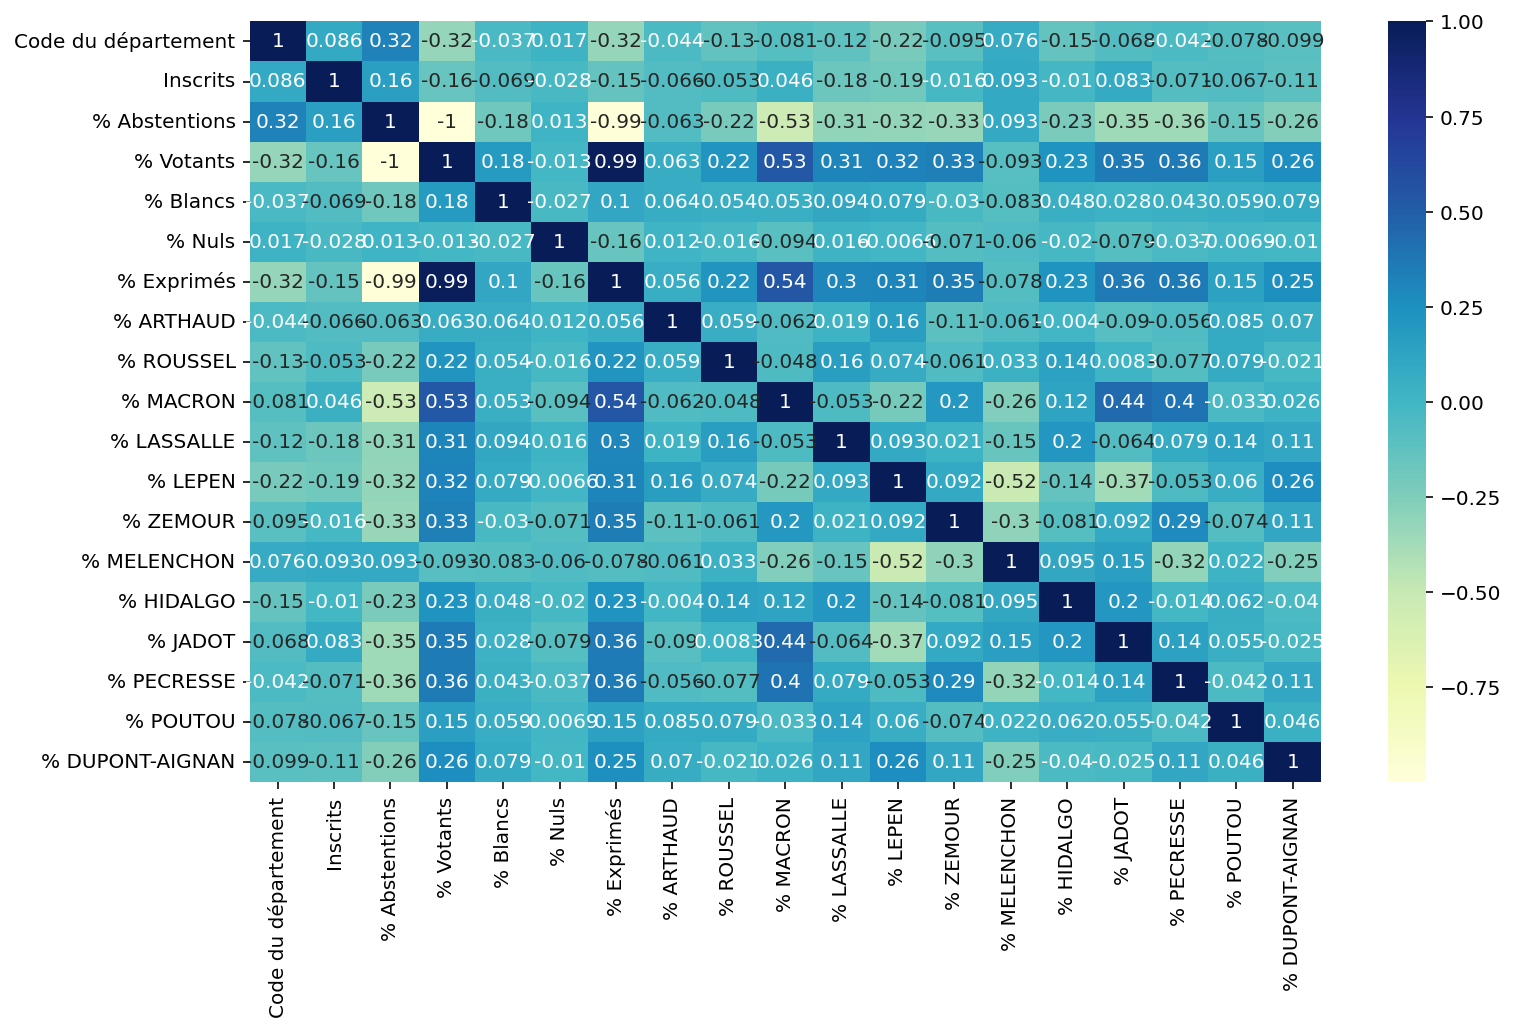

In [28]:
# Matrice de corrélation
corr_matrix = df_ACP.corr()
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

Première remarque : on observe une très forte corrélation entre le pourcentage de personnes ayant voté, et ceux s'étant abstenu On peut le regarder plus en détail en traçant la courbe du pourcentage de votants par rapport aux abstentions :


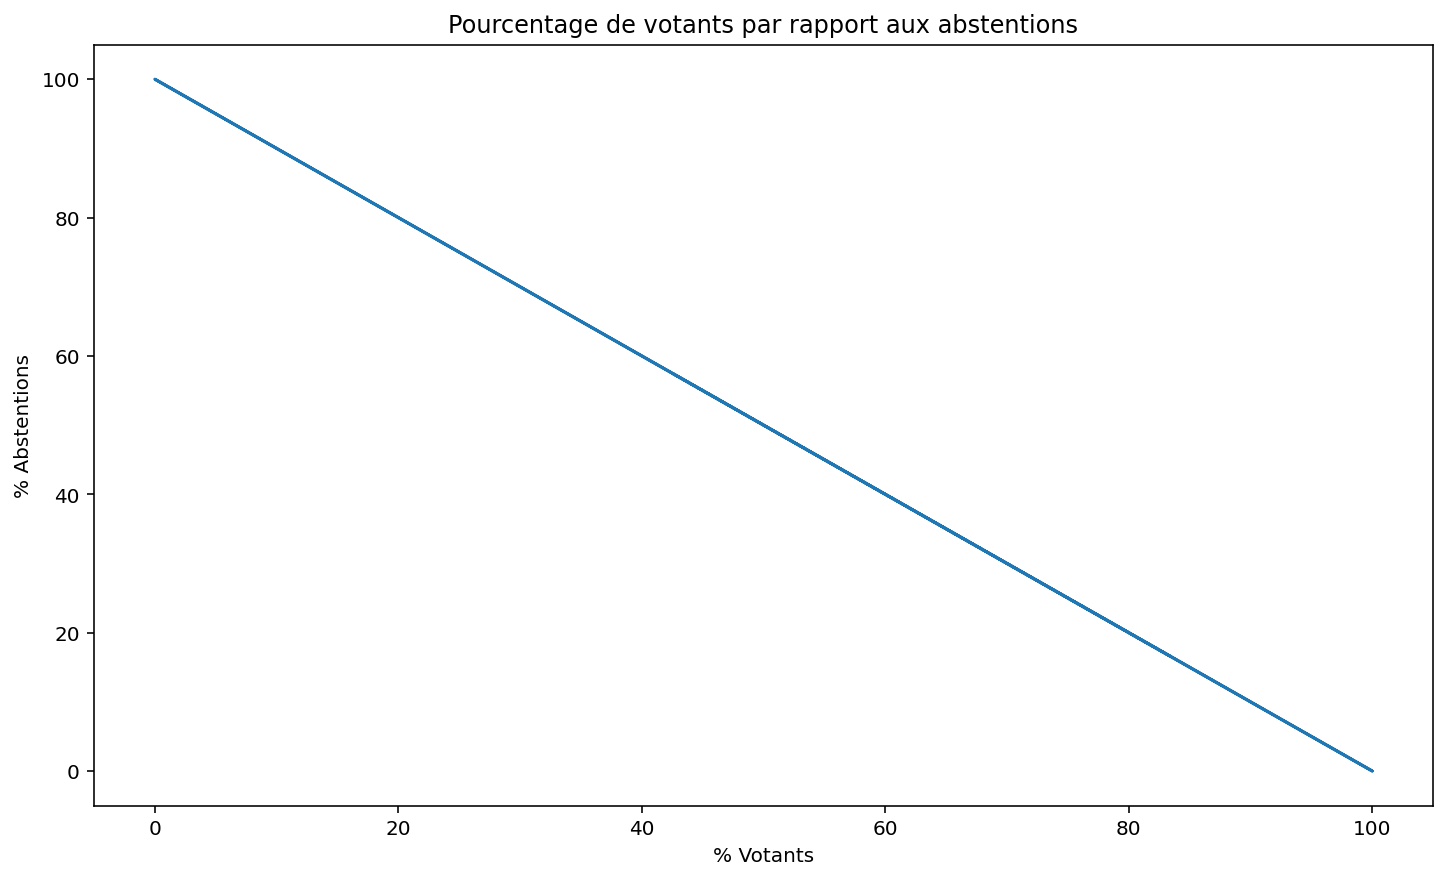

In [29]:
plt.plot(df_ACP[['% Votants']],df_ACP[['% Abstentions']])
plt.title("Pourcentage de votants par rapport aux abstentions")
plt.xlabel("% Votants")
plt.ylabel("% Abstentions")
plt.show()

Ce premier résultat n'est pas étonnant puisque l'on a la relation : 

% Votants = 1 \- % Abstentions

Cela nous permet tout de même de vérifier que nos données sont bien cohérentes.

Passons désormais à une analyse plus poussée et intéressantes de ces relations :


#### Relation entre le nombre d'inscrits et les scores des candidats

On remarque globalement une très faible relation entre les résultats pour un candidats donné et le nombre d'inscrits.

Le candidat où la corrélation est la plus forte est Marine Lepen avec un coefficient de \-0,19.

Ce qui va dans le sens de notre première hypothèse : moins il y a d'inscrits \(à la campagne\), plus la candidate recueille de voix.

Tandis ce que Macron ou Mélenchon ont un coefficient positif avec le nombre d'inscrits \(mais particulièrement faible\)


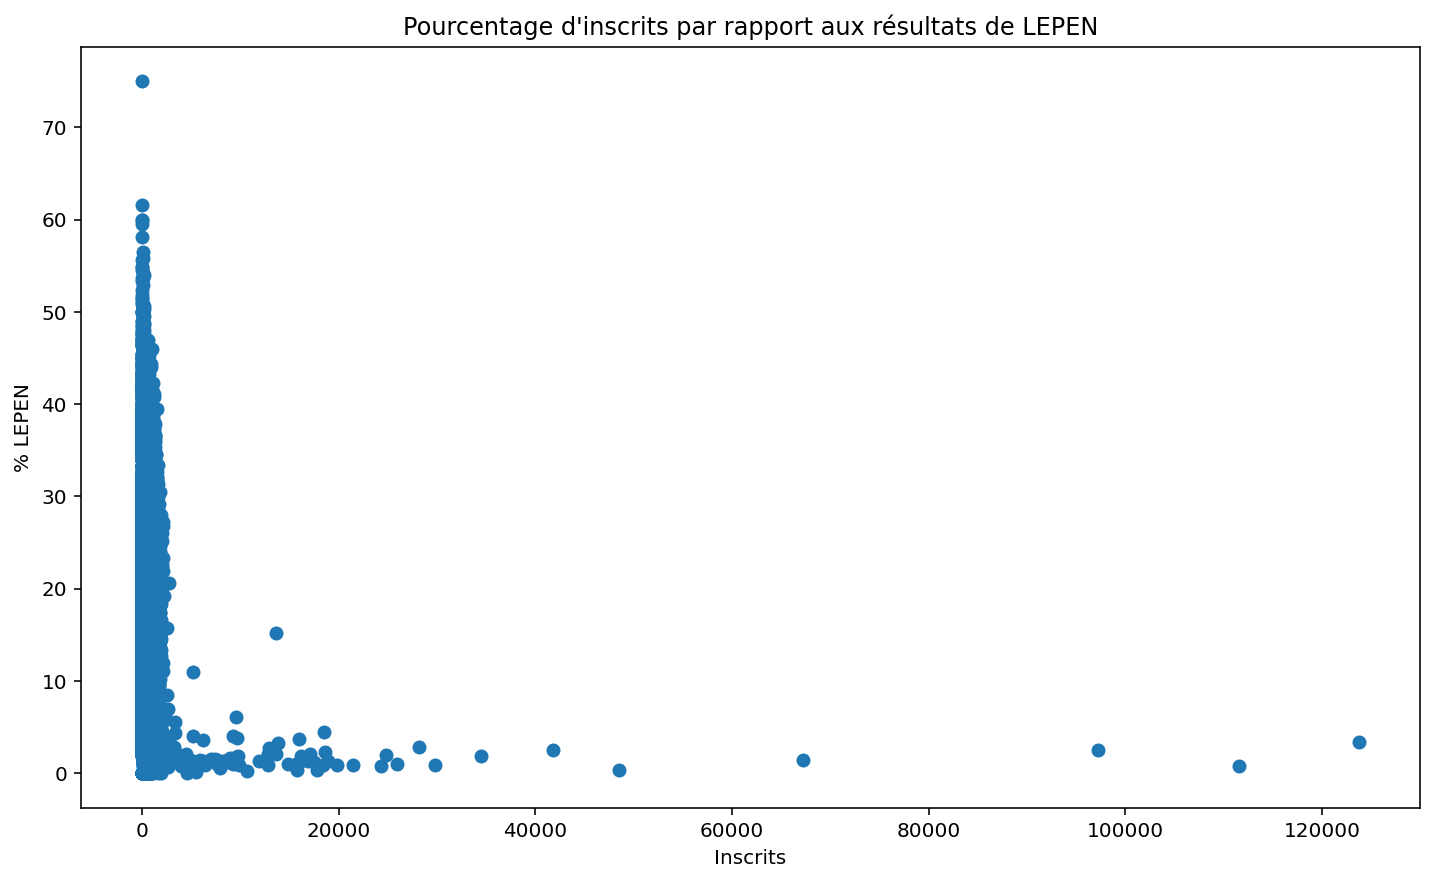

In [30]:
# Pourcentage d'inscrits par rapport aux résultats de LEPEN (avec tous les résultats)
plt.scatter(df_ACP[['Inscrits']],df_ACP[['% LEPEN']])
plt.title("Pourcentage d'inscrits par rapport aux résultats de LEPEN")
plt.xlabel("Inscrits")
plt.ylabel("% LEPEN")
plt.show()

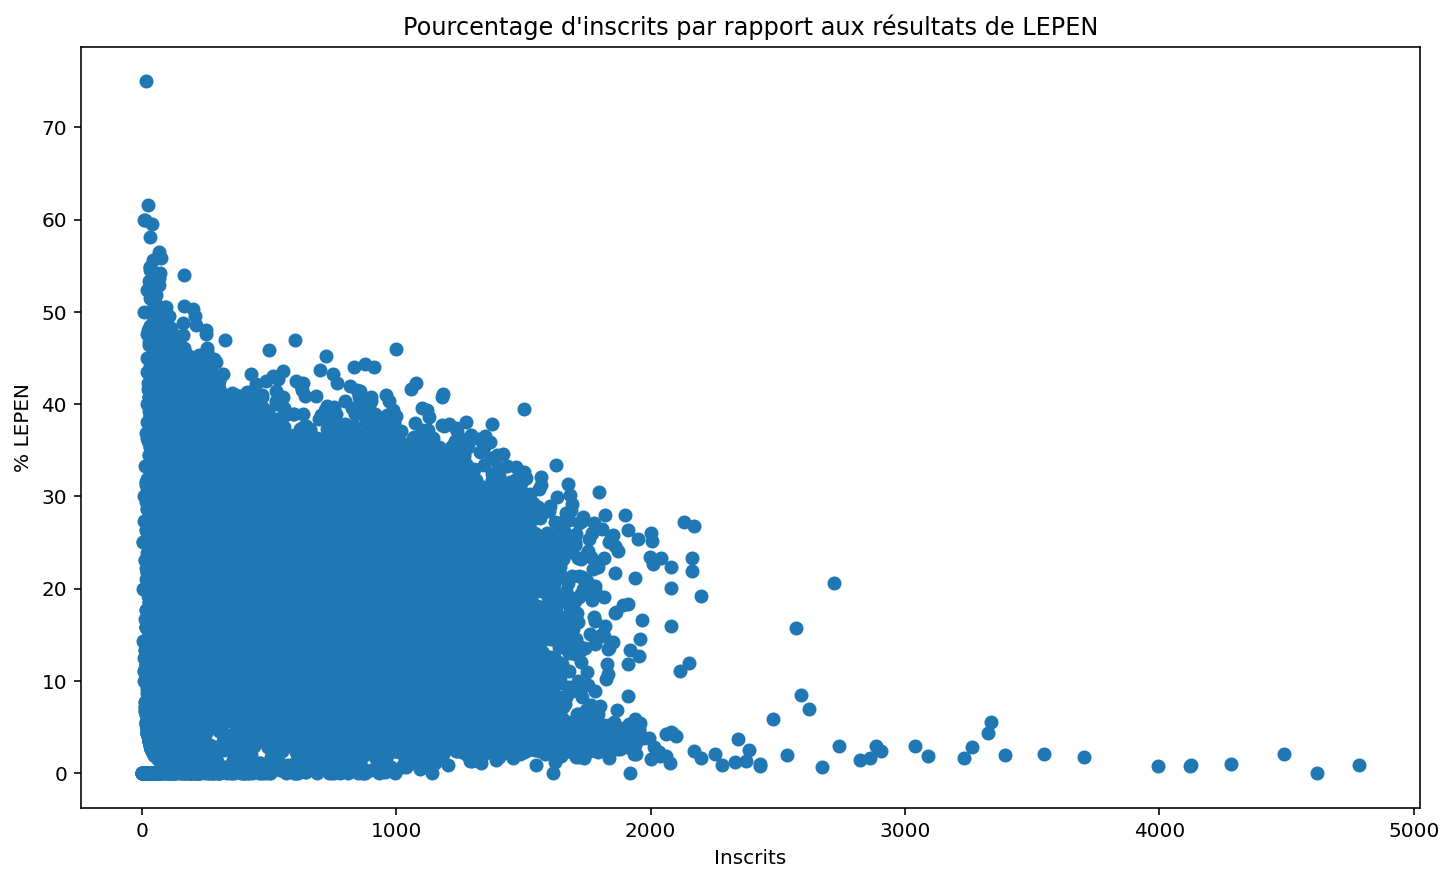

In [31]:
# Pourcentage d'inscrits par rapport aux résultats de LEPEN (sans les valeurs extremes)
df_filtre = df_ACP[df_ACP['Inscrits'] < 5000]
plt.scatter(df_filtre[['Inscrits']],df_filtre[['% LEPEN']])
plt.title("Pourcentage d'inscrits par rapport aux résultats de LEPEN")
plt.xlabel("Inscrits")
plt.ylabel("% LEPEN")
plt.show()

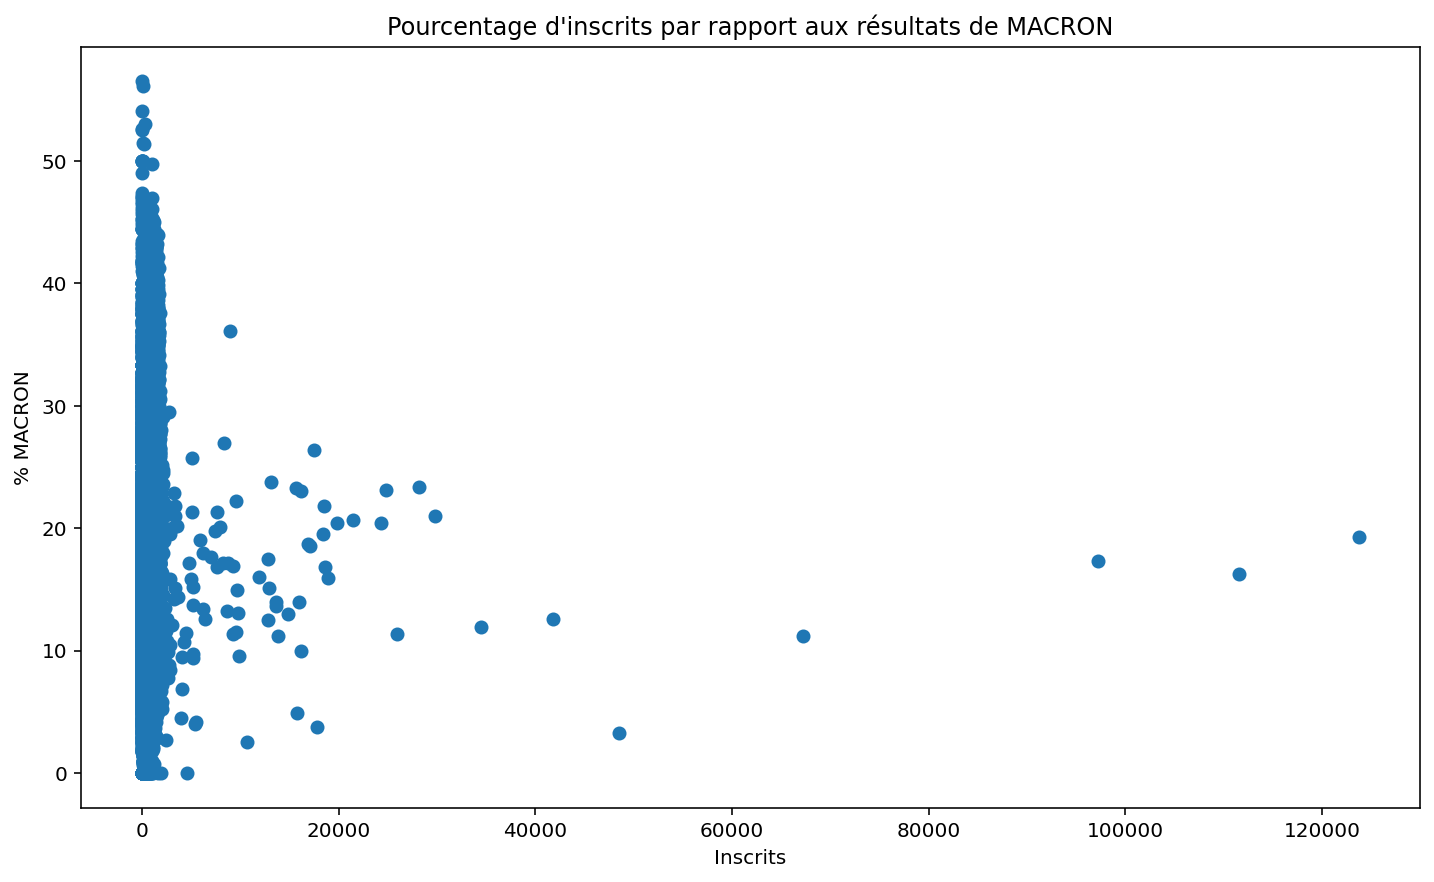

In [32]:
# Pourcentage d'inscrits par rapport aux résultats de MACRON (avec tous les résultats)
plt.scatter(df_ACP[['Inscrits']],df_ACP[['% MACRON']])
plt.title("Pourcentage d'inscrits par rapport aux résultats de MACRON")
plt.xlabel("Inscrits")
plt.ylabel("% MACRON")
plt.show()

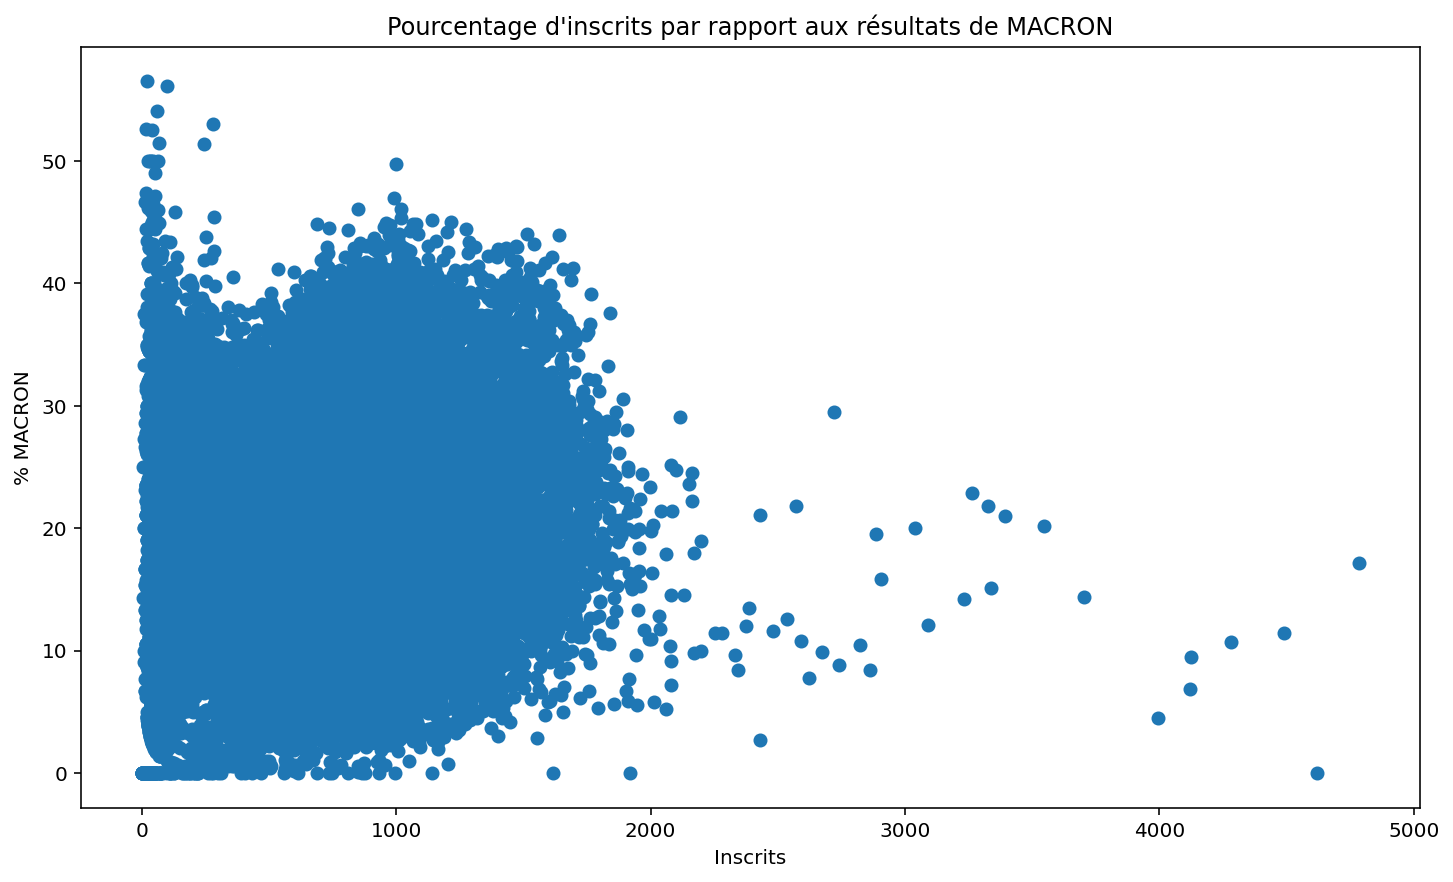

In [33]:
# Pourcentage d'inscrits par rapport aux résultats de MACRON (sans les valeurs extremes)
df_filtre = df_ACP[df_ACP['Inscrits'] < 5000]
plt.scatter(df_filtre[['Inscrits']],df_filtre[['% MACRON']])
plt.title("Pourcentage d'inscrits par rapport aux résultats de MACRON")
plt.xlabel("Inscrits")
plt.ylabel("% MACRON")
plt.show()

On remarque sur ces différents graphiques que Macron a de meilleurs résultat là où il y a un plus grand nombre d'inscrits que Lepen

Pour ce qui est des valeurs extrêmes qui représente principalement l'étranger, on peut aussi remarquer que Lepen obtient de très mauvais résultat contrairement à Macron.



#### Relation entre l'abstention et les scores des candidats

On remarque ici des relations bien plus fortes que pour l'analyse précédentes.

Le coefficient le plus fort est à retrouver du côté d'Emmanuel Macron \(\-0,53\). Plus il y a d'abstention, moins bien sont ses résultats.

Sur 12 candidats, 10 ont un coefficients négatifs, donc voient leur score baisser quand il y a de l'abstention.

Seul 2 candidats, Mélenchon et Arthaud ont un coefficient positif, signifiant que plus il y a d'abstention, meilleurs sont leurs résultats \(leurs coefficients sont cependant minimes\)


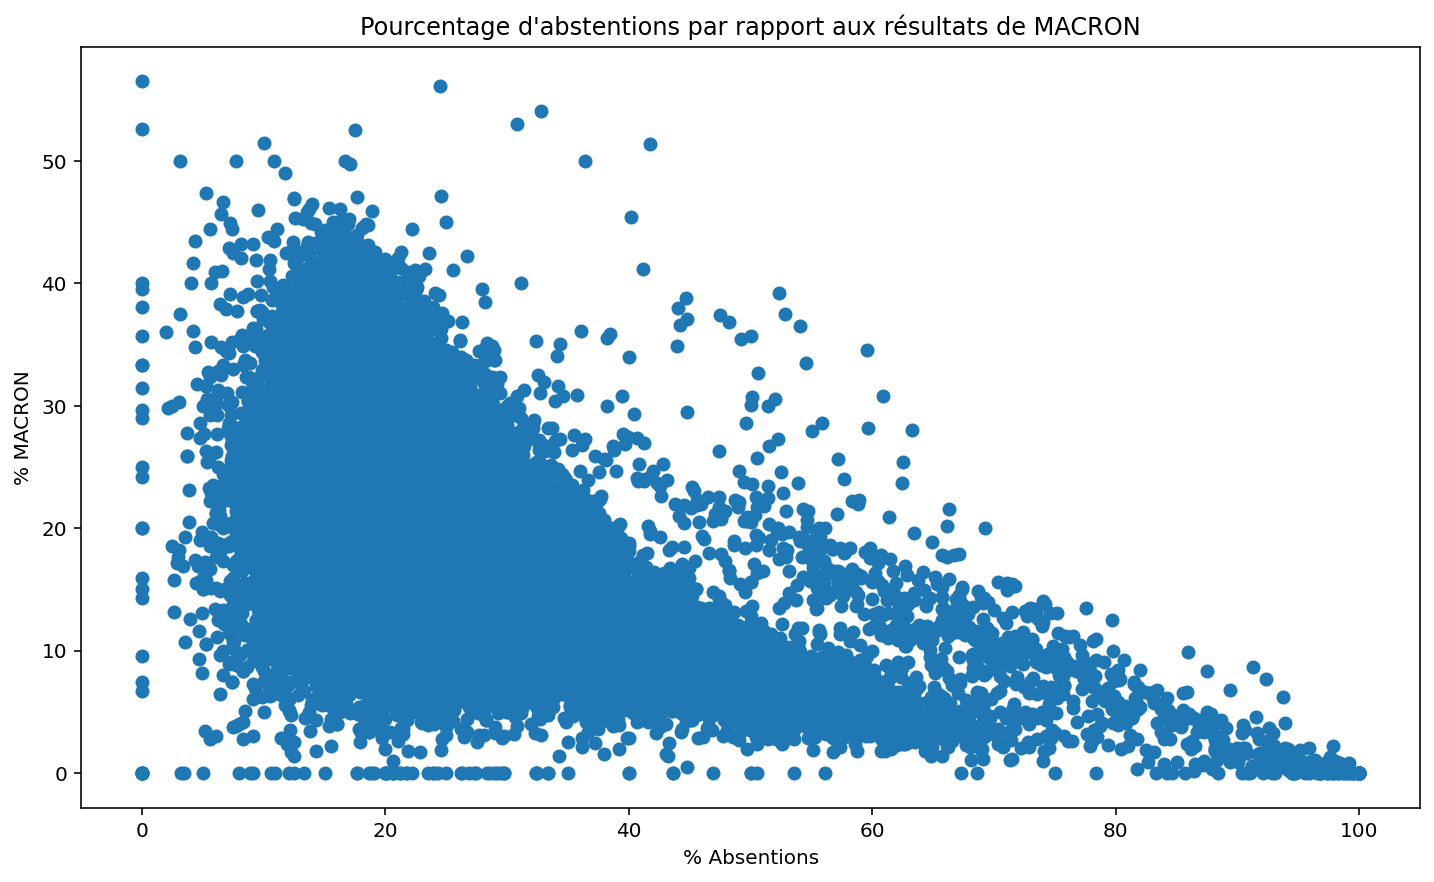

In [34]:
# Pourcentage d'abstentions par rapport aux résultats de MACRON 
plt.scatter(df_filtre[['% Abstentions']],df_filtre[['% MACRON']])
plt.title("Pourcentage d'abstentions par rapport aux résultats de MACRON")
plt.xlabel("% Absentions")
plt.ylabel("% MACRON")
plt.show()

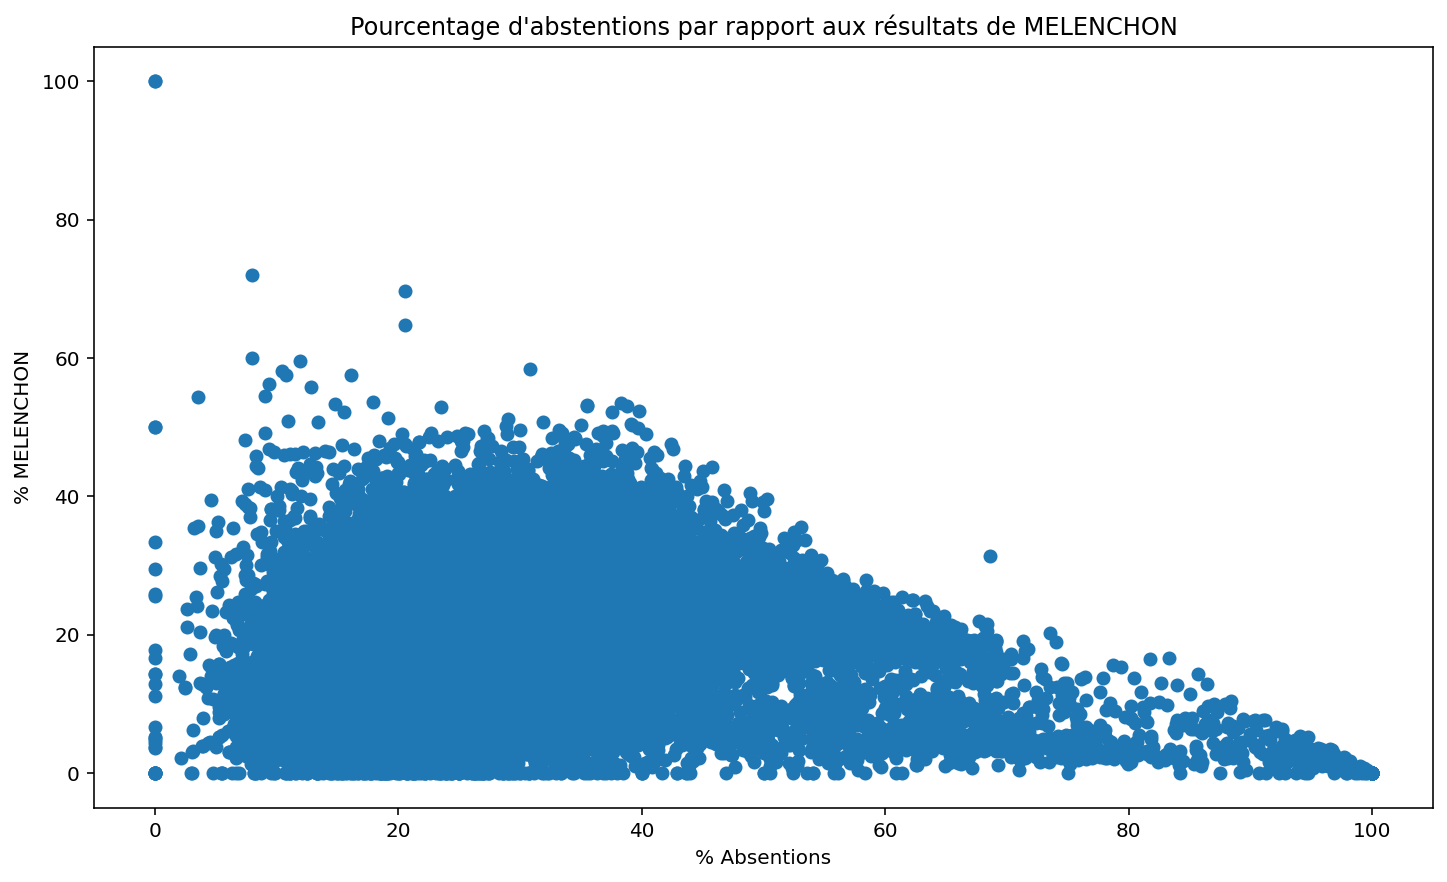

In [35]:
# Pourcentage d'abstentions par rapport aux résultats de MELENCHON 
plt.scatter(df_ACP[['% Abstentions']],df_ACP[['% MELENCHON']])
plt.title("Pourcentage d'abstentions par rapport aux résultats de MELENCHON")
plt.xlabel("% Absentions")
plt.ylabel("% MELENCHON")
plt.show()

#### Relation entre les candidats

Pour terminer cette première analyse regardons les liens qu'il peut y avoir entre les différents candidats :

On observe tout d'abord une corrélation entre les résultats de Macron est de Jadot \(0,44\).

Mais aussi entre Mélenchon et Lepen \(\-0,52\). Cette fois le coefficient est négatif. On remarque ainsi que les résultats de Mélenchon dépendent négativement de ceux de Lepen.


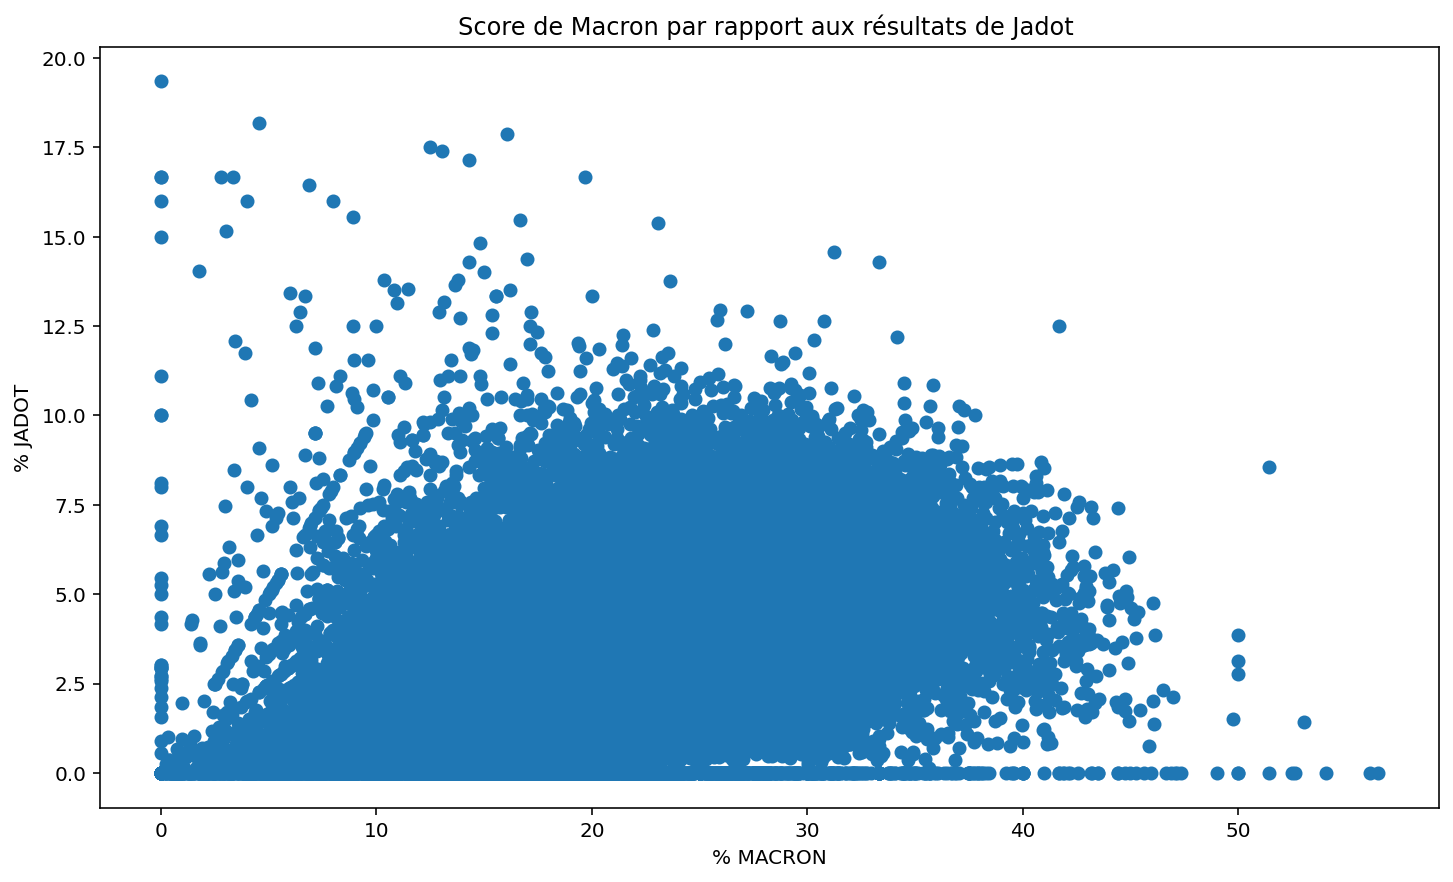

In [36]:
# Score de Macron par rapport aux résultats de Jadot (en filtrant les valeurs extremes de Jadot)
df_filtre = df_ACP[df_ACP['% JADOT'] < 20]
plt.scatter(df_filtre[['% MACRON']],df_filtre[['% JADOT']])
plt.title("Score de Macron par rapport aux résultats de Jadot ")
plt.xlabel("% MACRON")
plt.ylabel("% JADOT")
plt.show()

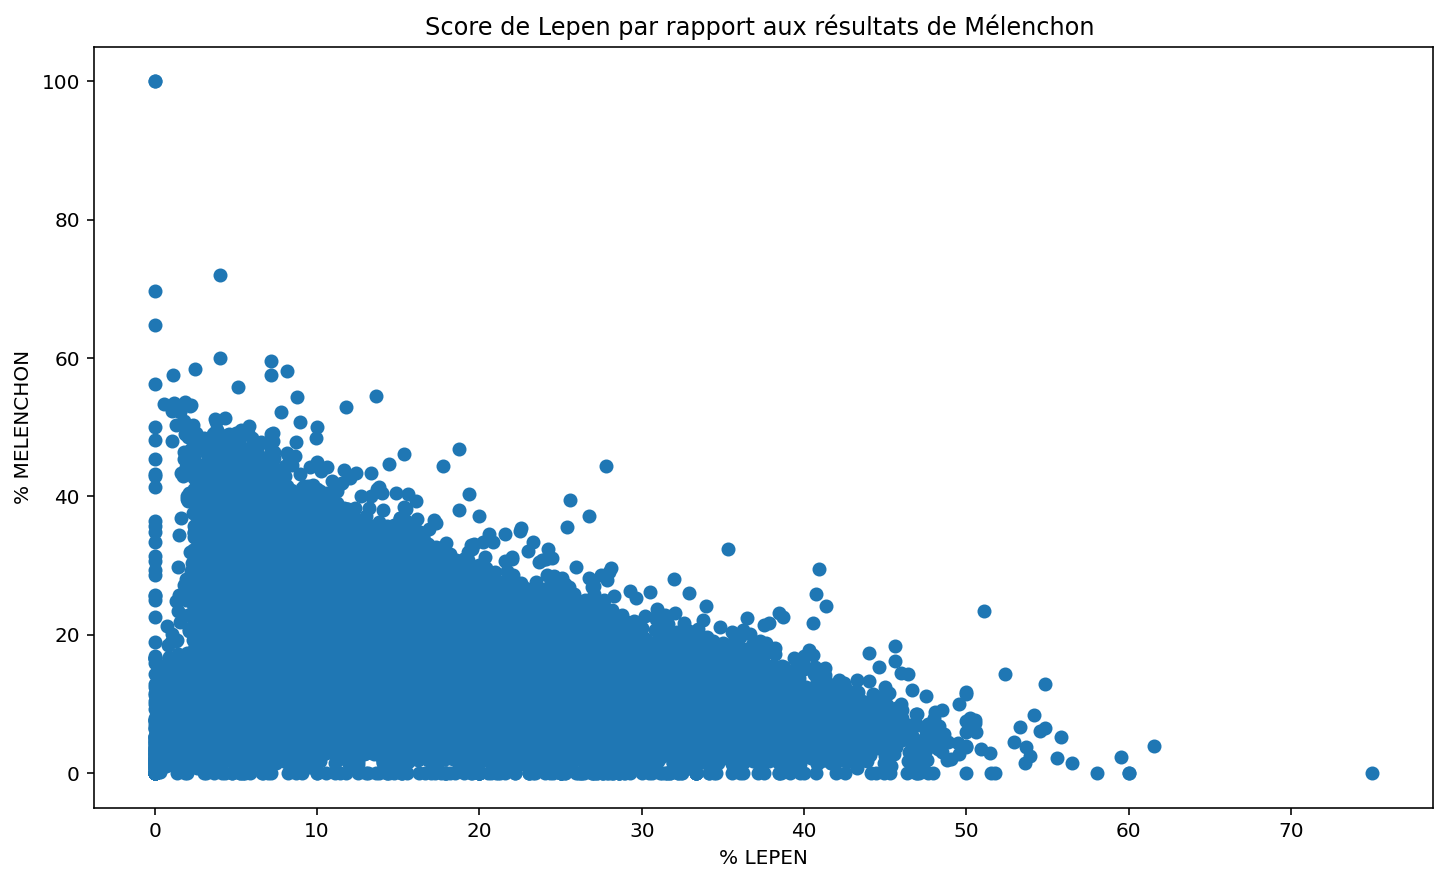

In [37]:
# Score de Lepen par rapport aux résultats de Mélenchon 
plt.scatter(df_ACP[['% LEPEN']],df_ACP[['% MELENCHON']])
plt.title("Score de Lepen par rapport aux résultats de Mélenchon ")
plt.xlabel("% LEPEN")
plt.ylabel("% MELENCHON")
plt.show()

Les résultats sont très marqués entre Mélenchon et Lepen où l'on voit bien que meilleurs sont les résultats de Mélenchon et moins bon sont ceux de Lepen, et inversement.


Cette première phase d'analyse étant passé, réalisons désormais l'ACP


## 3e Partie : Analyse en Composantes Principales \(ACP\)



In [10]:
#Affichage des dimensions du tableau
print(df_ACP.shape)

#nombre d'observations
n = df_ACP.shape[0]

#nombre de variables
p = df_ACP.shape[1]

(69682, 19)


In [11]:
# Standardisation des données
sc = StandardScaler()
df_ACP_norm = sc.fit_transform(df_ACP)

In [40]:
print(np.mean(df_ACP_norm,axis=0))
print(np.std(df_ACP_norm,axis=0,ddof=0))

[ 7.83236912e-17 -2.61078971e-17 -4.96050044e-16  5.74373735e-16
  6.20062555e-17  3.91618456e-17  8.09344809e-16 -1.02799845e-16
  2.61078971e-17  4.69942147e-16  1.43593434e-16 -1.30539485e-16
  3.91618456e-17  1.63174357e-17 -3.23085226e-16 -1.30539485e-17
 -3.26348713e-16  5.22157941e-17 -8.48506654e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


On trouve une variance égale à 1 et une moyenne très proche de 0.

Nos données sont bien normalisées !


##### On peut maintenant réaliser l'analyse en composantes principales :



In [12]:
acp = PCA(svd_solver='full')
coord = acp.fit_transform(df_ACP_norm)

On a ainsi créé une instance de la classe PCA et stocké les résultats de l'analyse, y compris les coordonnées factorielles, dans les variables acp et coord,


In [13]:
# Analyse des valeurs propres
eigval = acp.explained_variance_

comp = pd.DataFrame({
        "Valeur propre" : eigval,
        "% variance expliquée" : np.round(acp.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(acp.explained_variance_ratio_) * 100)
    },
    columns = ["Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

Valeur propre  % variance expliquée  % cum. var. expliquée
0    4.418164e+00                  23.0                   23.0
1    2.135752e+00                  11.0                   34.0
2    1.751145e+00                   9.0                   44.0
3    1.079540e+00                   6.0                   49.0
4    1.067182e+00                   6.0                   55.0
5    9.896642e-01                   5.0                   60.0
6    9.485957e-01                   5.0                   65.0
7    8.927396e-01                   5.0                   70.0
8    8.893350e-01                   5.0                   75.0
9    8.734183e-01                   5.0                   79.0
10   8.328012e-01                   4.0                   84.0
11   7.438240e-01                   4.0                   87.0
12   6.851066e-01                   4.0                   91.0
13   6.629852e-01                   3.0                   95.0
14   5.834301e-01                   3.0                   98.0
15   4.363847e-01                   2.0                  100.0
16   1.020349e-02                   0.0                  100.0
17   5.726708e-07                   0.0                  100.0
18   1.444432e-07                   0.0                  100.0

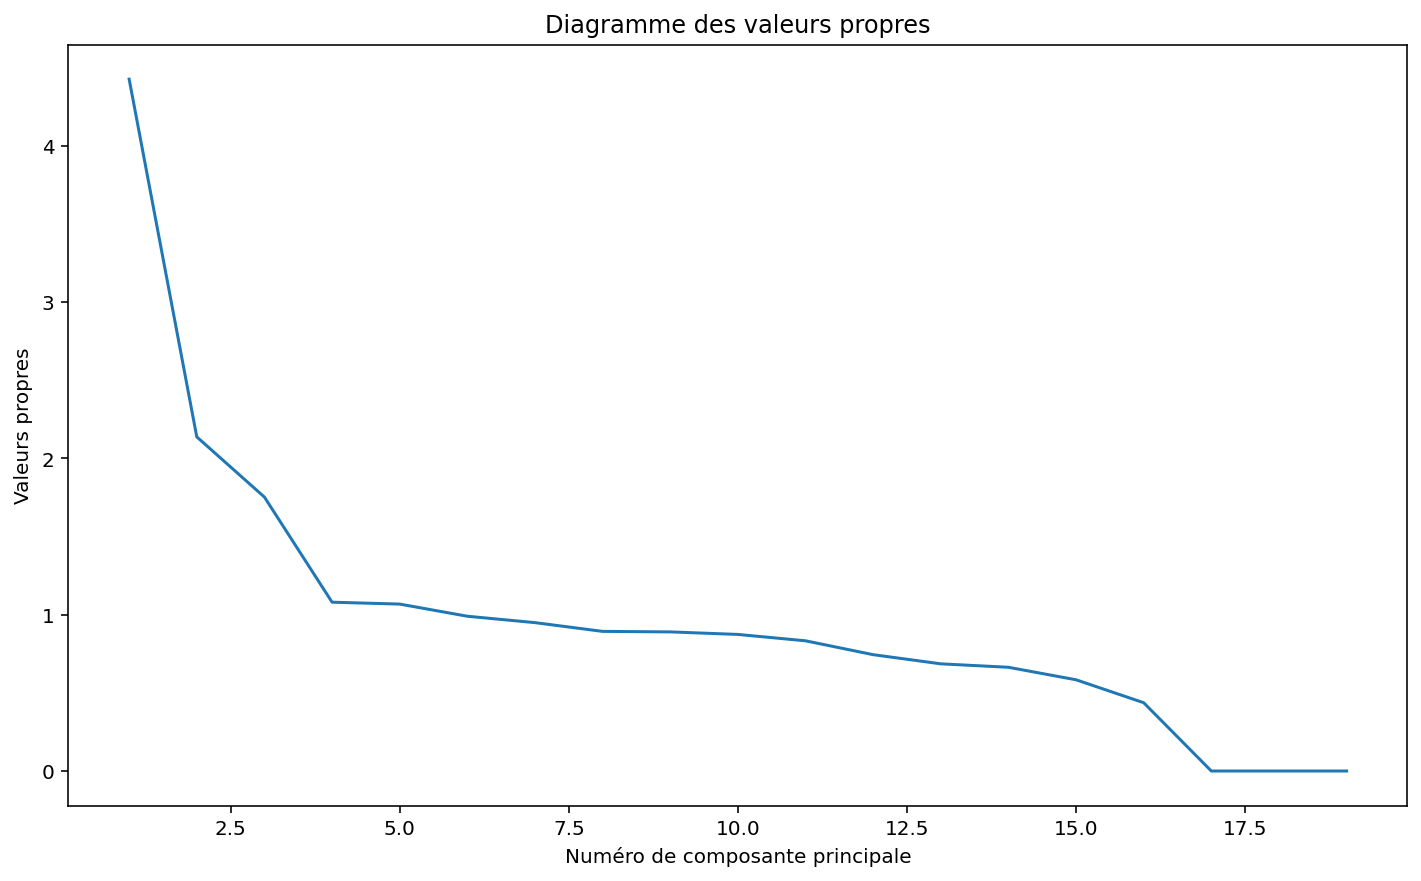

In [43]:
# Tracé du "diagramme des valeurs propres"
plt.plot(np.arange(1,p+1),eigval)
plt.title("Diagramme des valeurs propres")
plt.ylabel("Valeurs propres")
plt.xlabel("Numéro de composante principale")
plt.show()

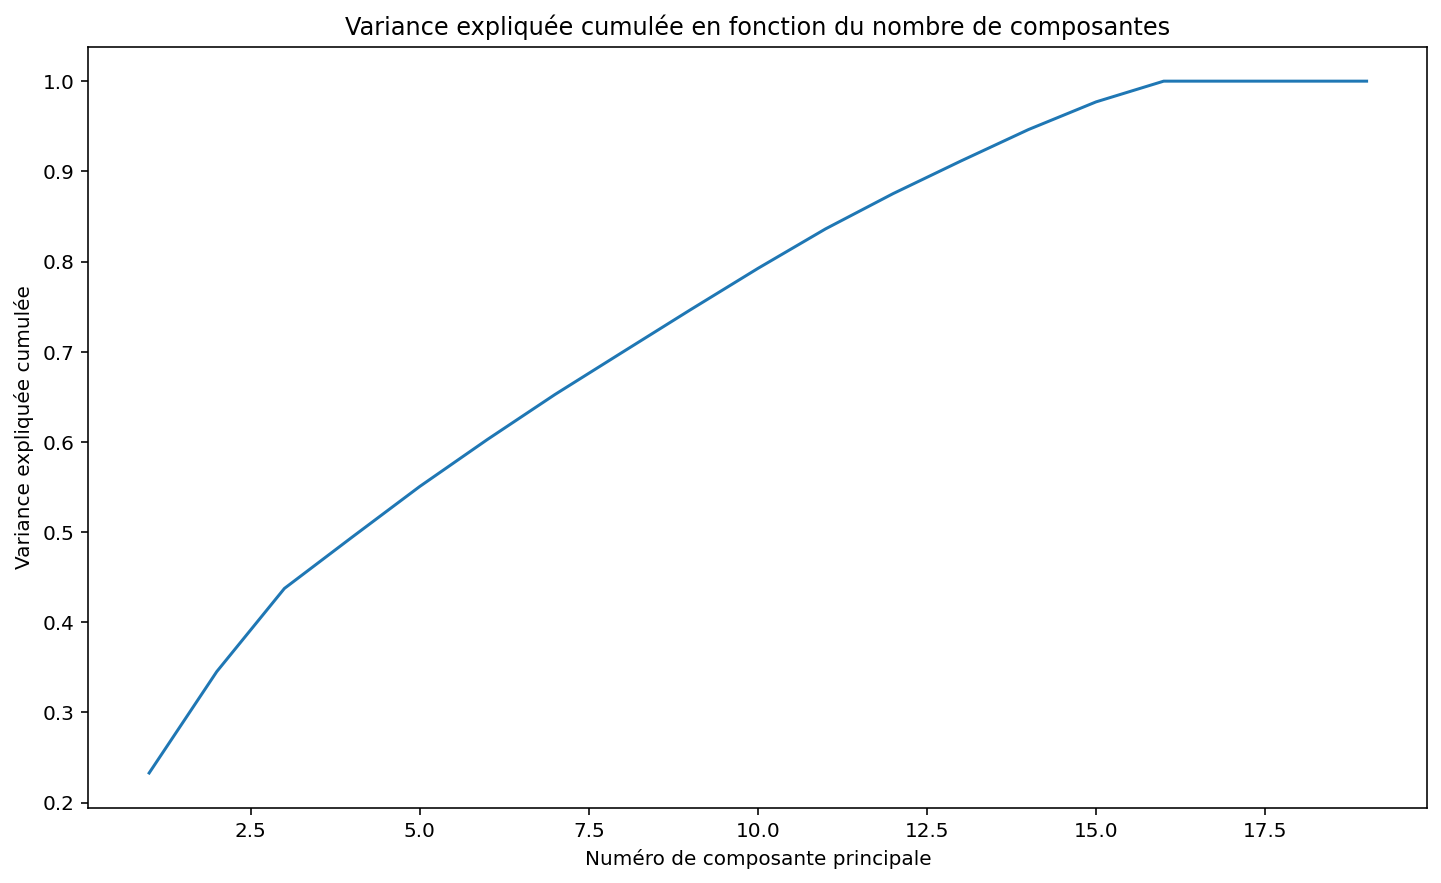

In [44]:
# Tracé de la variance expliquée cumulée en fonction du nombre de composantes
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée cumulée en fonction du nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.xlabel("Numéro de composante principale")
plt.show()

In [14]:
# Calcul des seuils
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

      Val.Propre    Seuils
0   4.418164e+00  3.547740
1   2.135752e+00  2.547740
2   1.751145e+00  2.047740
3   1.079540e+00  1.714406
4   1.067182e+00  1.464406
5   9.896642e-01  1.264406
6   9.485957e-01  1.097740
7   8.927396e-01  0.954883
8   8.893350e-01  0.829883
9   8.734183e-01  0.718771
10  8.328012e-01  0.618771
11  7.438240e-01  0.527862
12  6.851066e-01  0.444529
13  6.629852e-01  0.367606
14  5.834301e-01  0.296177
15  4.363847e-01  0.229511
16  1.020349e-02  0.167011
17  5.726708e-07  0.108187
18  1.444432e-07  0.052632


In [15]:
# Conversion en DataFrame pour les données normalisées et les coordonnées factorielles
df_ACP_norm = pd.DataFrame(df_ACP_norm)
cf = pd.DataFrame(coord,index=df_ACP_norm.index,columns=np.arange(1,p+1))
print(cf)

             1         2         3         4         5         6         7   \
0     -2.099218 -0.579309  0.687750  0.812064  0.642256 -0.147594  0.453958   
1     -1.588884  0.967207 -1.765222  0.200191 -0.015584  0.299046 -0.249935   
2     -0.062464 -0.347220 -0.861956  0.586959 -1.017653  0.030277  0.520204   
3     -0.314497  0.335721 -0.093622  0.643337 -0.534044  0.479190  0.434082   
4     -0.747231  0.695720 -0.318503  0.959495 -0.903333  0.958712  0.241271   
...         ...       ...       ...       ...       ...       ...       ...   
69677  7.829105  7.297245  4.504076  6.130676 -1.862809  3.738362  8.166213   
69678  5.488575  1.820348  1.974732 -0.535493  0.382425 -0.607965 -0.516651   
69679  5.309175  0.864223  2.036434 -0.885892  0.870983 -1.455410  0.447499   
69680  9.419789  0.290003  2.446546 -1.553468  0.165139 -0.990726 -0.027074   
69681  5.143146 -0.224099  4.037006 -1.603672  0.583944 -2.166986  0.844892   

              8          9         10        11    

In [16]:
# Calcul de la distance au carré pour chaque individu
di = np.sum(df_ACP_norm**2,axis=1)
pd.DataFrame({'ID':df_ACP_norm.index,'d_i':di})

ID         d_i
0          0   11.387497
1          1   13.815686
2          2    5.580566
3          3    4.431531
4          4    6.353667
...      ...         ...
69677  69677  646.233086
69678  69678   43.765883
69679  69679   45.128802
69680  69680  108.607081
69681  69681   62.516339

[69682 rows x 2 columns]

In [17]:
# Calcul du carré du cosinus des variables pour mesurer la qualité de représentation des variables 
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
    
df_COS = pd.DataFrame({'id':df_ACP_norm.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2],'COS2_4':cos2[:,3],'COS2_5':cos2[:,4],'COS2_6':cos2[:,5]})
df_COS

id    COS2_1    COS2_2    COS2_3    COS2_4    COS2_5    COS2_6
0          0  0.386978  0.029471  0.041537  0.057910  0.036223  0.001913
1          1  0.182731  0.067712  0.225541  0.002901  0.000018  0.006473
2          2  0.000699  0.021604  0.133135  0.061736  0.185576  0.000164
3          3  0.022319  0.025433  0.001978  0.093395  0.064358  0.051816
4          4  0.087879  0.076181  0.015966  0.144898  0.128431  0.144661
...      ...       ...       ...       ...       ...       ...       ...
69677  69677  0.094849  0.082400  0.031392  0.058160  0.005370  0.021626
69678  69678  0.688309  0.075713  0.089101  0.006552  0.003342  0.008445
69679  69679  0.624598  0.016550  0.091894  0.017390  0.016810  0.046937
69680  69680  0.817004  0.000774  0.055112  0.022220  0.000251  0.009038
69681  69681  0.423121  0.000803  0.260691  0.041137  0.005454  0.075114

[69682 rows x 7 columns]

Si le cos2 d'une variable est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien la variable.



In [50]:
count = (df_COS['COS2_1'] > 0.5).sum()
print(count)

6892


On remarque que globalement, le premier axe représente assez mal les données tout seul



In [51]:
count = (df_COS['COS2_1']+df_COS['COS2_2']+df_COS['COS2_3']+df_COS['COS2_4']+df_COS['COS2_5']+df_COS['COS2_6'] > 0.5).sum()
print(count)

45078


On commence à avoir une bonne représentation lorsque l'on prend les 6 premiers axes.

Ce résultat est cohérent avec ce que nous avons pu faire auparavant. En effet, on aurait pu avoir la même conclusion à partir du diagramme de variance expliquée cumulée.


In [18]:
# Calcul des contributions
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
    
contribution = pd.DataFrame({'id':df_ACP_norm.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

La contribution des bureau de vote à la formation des axes indique l'importance relative de chaque bureau de vote pour expliquer la variabilité des données sur un axe principal donné.

La somme des contributions des bureau de vote sur un axe principal donné est égale à 100 %

On peut donc regarder si certains bureau de vote contribuent plus que d'autres :


In [60]:
contribution.describe()

id         CTR_1         CTR_2
count  69672.000000  6.967200e+04  6.967200e+04
mean   34835.500000  1.435276e-05  1.435276e-05
std    20112.718315  4.335290e-05  4.286486e-05
min        0.000000  3.536679e-14  9.898323e-15
25%    17417.750000  8.311737e-07  1.351991e-06
50%    34835.500000  3.544174e-06  5.990621e-06
75%    52253.250000  1.009748e-05  1.742069e-05
max    69671.000000  1.110828e-03  6.106331e-03

Au maximum, on a un bureau de vote qui contribue 77,6 \(=0,00111/0,0000143\) fois plus que la moyenne


In [65]:
# Recherche de la ligne de plus forte contribution
row = contribution.loc[contribution['CTR_1'] >= 0.0011]

# Affichage de la ligne correspondante
row

id     CTR_1     CTR_2
69569  69569  0.001111  0.004925

In [66]:
df_ACP[69569:69570]

Code du département  Inscrits  % Abstentions  % Votants  % Blancs  \
69569                  110    111590          69.07      30.93      0.15   

       % Nuls  % Exprimés  % ARTHAUD  % ROUSSEL  % MACRON  % LASSALLE  \
69569    0.21       30.58        0.1       0.19     16.28        0.22   

       % LEPEN  % ZEMOUR  % MELENCHON  % HIDALGO  % JADOT  % PECRESSE  \
69569     0.79      1.59         5.99       0.87     2.72        1.34   

       % POUTOU  % DUPONT-AIGNAN  
69569      0.17             0.32

Le bureau de vote qui contribue le plus est l'un qui compte le plus d'inscrits. Ce qui est peu étonnant.

On peut par contre se demander pourquoi nous ne sommes pas tomber sur le bureau de vote que nous avons étudié au tout début, celui de Genève.

Regardons le un peu plus en détail :


In [67]:
df_ACP[69544:69545]

Code du département  Inscrits  % Abstentions  % Votants  % Blancs  \
69544                  110      2388          65.79      34.21      0.21   

       % Nuls  % Exprimés  % ARTHAUD  % ROUSSEL  % MACRON  % LASSALLE  \
69544     0.0        34.0        0.0       0.17     13.44        0.63   

       % LEPEN  % ZEMOUR  % MELENCHON  % HIDALGO  % JADOT  % PECRESSE  \
69544     2.51      6.11         5.32       0.38     2.55        1.76   

       % POUTOU  % DUPONT-AIGNAN  
69544      0.13             1.01

On se rend compte que le bureau de vote de Genève a des résultats plus proche de la moyenne nationale que l'autre bureau de vote à la plus grande contribution. On peut vérifier cette intuition, en regardant la distance de chaque bureau de vote :


In [69]:
distance = pd.DataFrame({'ID':df_ACP_norm.index,'d_i':di})
distance[69544:69545] #Genève

ID       d_i
69544  69544  71.43691

In [70]:
distance[69569:69570] #+ forte contribution

ID           d_i
69569  69569  12687.303744

In [71]:
distance.describe()

ID           d_i
count  69672.000000  69672.000000
mean   34835.500000     19.000000
std    20112.718315    103.707248
min        0.000000      0.822679
25%    17417.750000      6.465740
50%    34835.500000     10.429839
75%    52253.250000     18.737754
max    69671.000000  15576.261402

On voit même que le bureau de vote à la plus forte contribution est aussi l'un dont la distance est la plus grande. Ce bureau de vote sera donc particulièrement intéressant à analyser pour comprendre les graphiques données par l'ACP.


In [74]:
# Recherche de la ligne de plus faible contribution
row = contribution.loc[contribution['CTR_1'] <= 0.000000000000036] 

# Affichage de la ligne correspondante
row

id         CTR_1         CTR_2
32094  32094  3.536679e-14  3.660166e-07

In [75]:
distance[32094:32095] #+ faible contribution

ID       d_i
32094  32094  1.956606

In [76]:
df_ACP[32094:32095] #+ faible contribution

Code du département  Inscrits  % Abstentions  % Votants  % Blancs  \
32094                   50       665          24.06      75.94       0.9   

       % Nuls  % Exprimés  % ARTHAUD  % ROUSSEL  % MACRON  % LASSALLE  \
32094    0.15       74.89       0.45        1.8     23.16        3.01   

       % LEPEN  % ZEMOUR  % MELENCHON  % HIDALGO  % JADOT  % PECRESSE  \
32094     20.3      2.71        13.98       1.05     2.71        2.71   

       % POUTOU  % DUPONT-AIGNAN  
32094      0.75             2.26

Au contraire, la ligne ayant la plus faible contribution est bien plus proche de la moyenne nationale, et n’apportera quasiment aucune information 


Passons maintenant à la représentation de nos données sur les axes principaux. Ne pouvant pas représenter un espace en 6 dimensions, nous allons nous contenter de 2 en sachant que cela ne représentera pas l'ensemble de nos données, mais seulement une projection sur 2 axes. Cela nous permettra tout de même de tirer quelques conclusions.



Afin d'avoir un code qui ne mettent pas trop longtemps à compiler, et lisible, on va prendre un échantillon de 500 lignes aléatoirement dans nos données :


In [51]:
# Sélection de l'échantillon
taille_sous_echantillon = 500
nombres = np.random.randint(0, n, size=taille_sous_echantillon)
nombres_tries = np.sort(nombres)

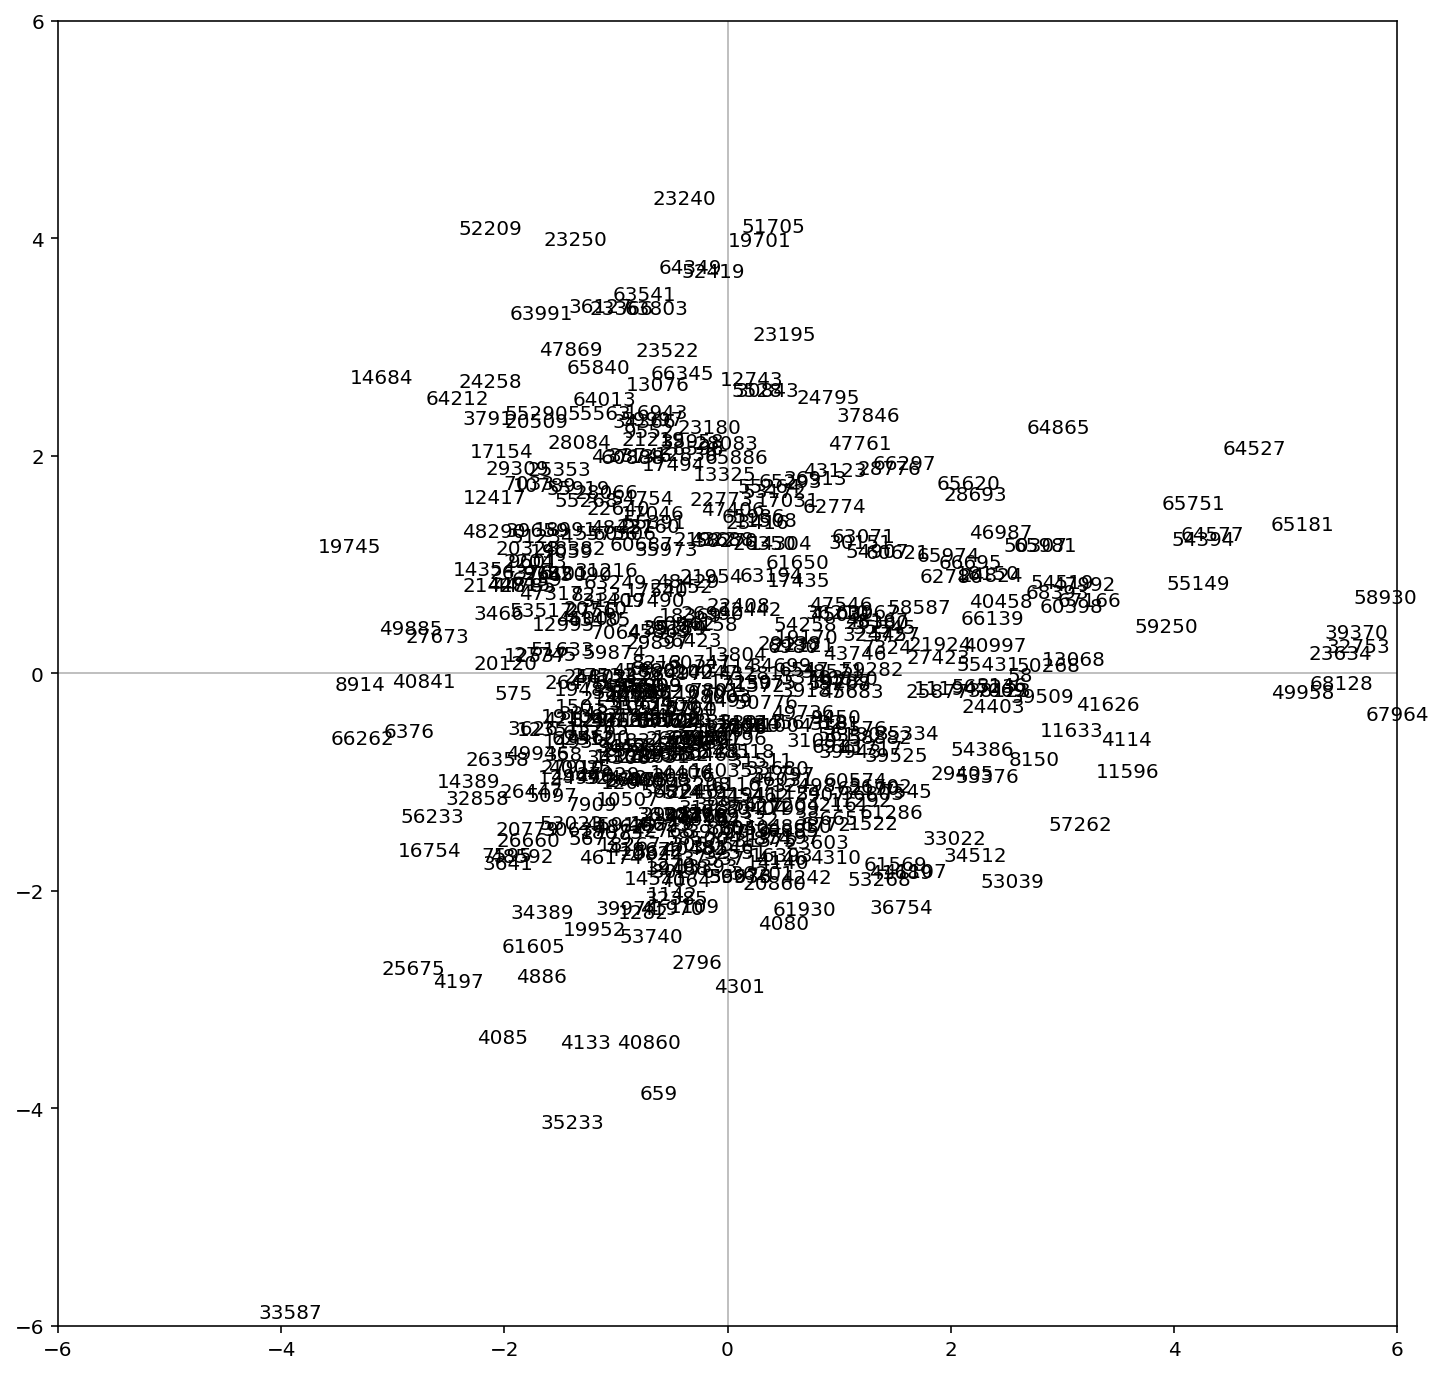

In [52]:
# Préparation de l'affichage
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(taille_sous_echantillon):
    plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]))
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.show()

Afin d'analyser ces résultats, on peut faire le cercle de corrélation :


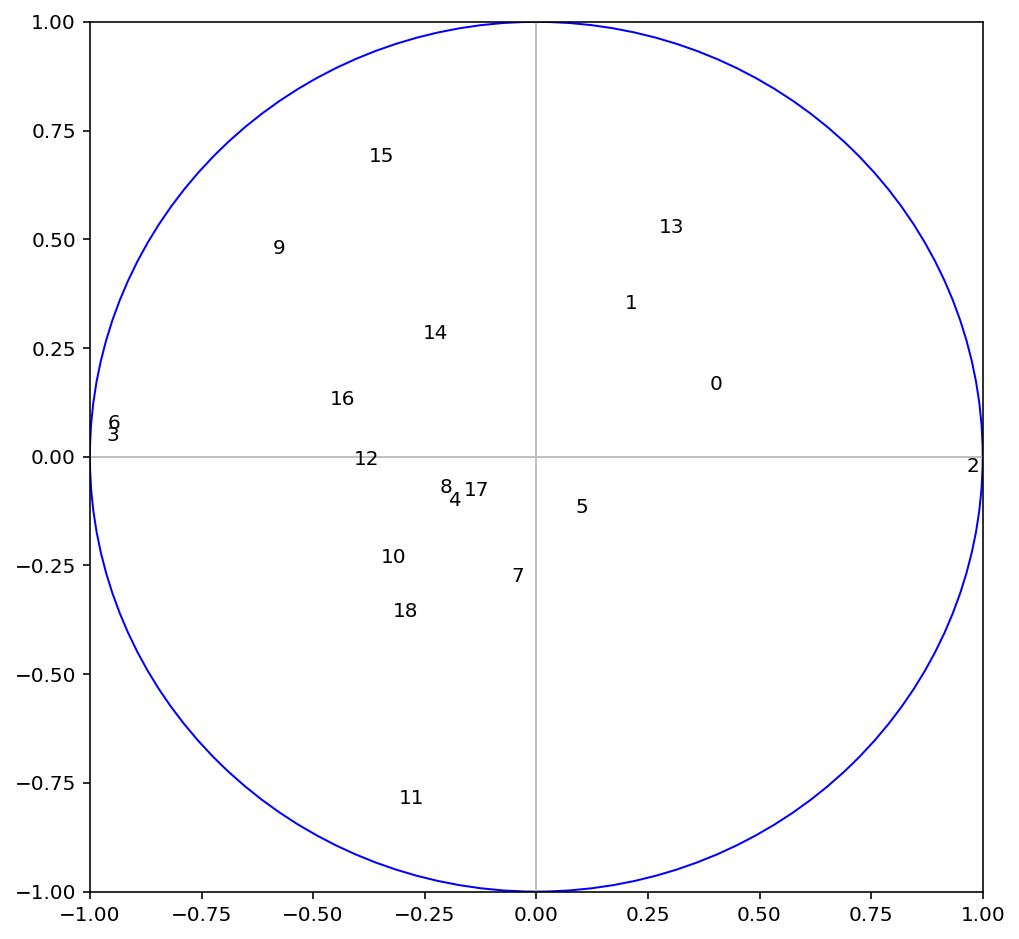

In [79]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
    plt.annotate(df_ACP_norm.columns[j],(corvar[j,0],corvar[j,1]))
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.show()

Renommons les variables pour une meilleur lisibilité


In [80]:
df_ACP_norm

0          1         2         3         4         5         6   \
0     -1.697506  -0.055365 -0.741313  0.741309  1.589498 -0.278993  0.652453   
1     -1.697506  -0.492800 -0.630859  0.630856  0.267116 -0.065627  0.618334   
2     -1.697506   0.434725 -0.056500  0.056497  0.489572 -0.086275  0.028285   
3     -1.697506   0.433712 -0.063529  0.063526  0.168246 -0.024330  0.053372   
4     -1.697506   0.519781 -0.385853  0.385849 -0.462048  0.065146  0.413623   
...         ...        ...       ...       ...       ...       ...       ...   
69667  1.834970  24.472388  3.271170 -3.271171 -1.277723 -0.306524 -3.121653   
69668  1.834970   1.022022  3.112518 -3.112520 -0.894603 -0.306524 -2.993207   
69669  1.834970  -0.590007  3.070345 -3.070346  0.637877 -0.389117 -3.063451   
69670  1.834970   0.013491  5.365774 -5.365774 -1.475462 -0.196399 -5.213919   
69671  1.834970  -0.570768  3.336438 -3.336439  1.255812 -0.389117 -3.379549   

             7         8         9         10        11        12        13  \
0      0.049351 -0.612547  0.536741 -0.068419  0.508558  0.562717 -0.656389   
1      1.064861  1.159509  0.567801  0.582548 -0.985574  0.525448  0.613969   
2     -0.209928  0.686460 -0.821031 -0.294545  0.252247  0.354012  0.597069   
3      0.178991 -0.447355 -0.267865 -0.448721 -0.035646  0.324197  0.325252   
4      0.459877 -0.199568 -0.111085 -0.232874 -0.024714  0.350285  0.537917   
...         ...       ...       ...       ...       ...       ...       ...   
69667 -0.750093 -1.183208  0.520471 -0.863284 -2.065478 -0.834863 -1.261993   
69668 -0.706880 -1.265804 -0.429082 -0.805040 -2.090988  0.365193 -0.646531   
69669 -0.966159 -0.672616  0.257199 -0.733091 -1.986520  0.305562 -1.014118   
69670 -0.966159 -1.205734 -0.912733 -0.976347 -2.229468 -0.983938 -1.722533   
69671 -0.966159 -0.755212 -0.185038 -1.024313 -2.029036  2.735488 -1.890130   

             14        15        16        17        18  
0     -0.492714  0.771476  0.150833 -0.239118  1.336088  
1      0.129016  0.791429  0.035209  1.427992 -1.412086  
2      0.050066 -0.445636 -0.059003  0.186527 -0.442638  
3      0.395471  0.487151  0.018079 -0.451941  0.080021  
4      0.040197  1.125635 -0.337356 -0.629293 -0.088579  
...         ...       ...       ...       ...       ...  
69667 -0.196652  0.442257 -0.577169 -0.735704 -0.771408  
69668 -0.571664  0.846298 -0.748463 -0.026296 -0.914717  
69669 -1.262474  0.157932 -1.574959 -1.072673 -0.695538  
69670 -0.986150 -0.849677 -1.275193 -0.824380 -1.294067  
69671 -1.262474 -1.548020  0.313562 -1.072673 -0.788268  

[69672 rows x 19 columns]

In [81]:
df_ACP

Code du département  Inscrits  % Abstentions  % Votants  % Blancs  \
0                        1       645          16.74      83.26      2.48   
1                        1       213          17.84      82.16      1.41   
2                        1      1129          23.56      76.44      1.59   
3                        1      1128          23.49      76.51      1.33   
4                        1      1213          20.28      79.72      0.82   
...                    ...       ...            ...        ...       ...   
69667                  110     24868          56.70      43.30      0.16   
69668                  110      1709          55.12      44.88      0.47   
69669                  110       117          54.70      45.30      1.71   
69670                  110       713          77.56      22.44      0.00   
69671                  110       136          57.35      42.65      2.21   

       % Nuls  % Exprimés  % ARTHAUD  % ROUSSEL  % MACRON  % LASSALLE  \
0        0.16       80.62       0.47       0.93     23.26        2.79   
1        0.47       80.28       0.94       3.29     23.47        4.69   
2        0.44       74.40       0.35       2.66     14.08        2.13   
3        0.53       74.65       0.53       1.15     17.82        1.68   
4        0.66       78.24       0.66       1.48     18.88        2.31   
...       ...         ...        ...        ...       ...         ...   
69667    0.12       43.01       0.10       0.17     23.15        0.47   
69668    0.12       44.29       0.12       0.06     16.73        0.64   
69669    0.00       43.59       0.00       0.85     21.37        0.85   
69670    0.28       22.16       0.00       0.14     13.46        0.14   
69671    0.00       40.44       0.00       0.74     18.38        0.00   

       % LEPEN  % ZEMOUR  % MELENCHON  % HIDALGO  % JADOT  % PECRESSE  \
0        23.10      6.67        10.23       0.78     4.65        4.03   
1        10.80      6.57        19.25       1.41     4.69        3.76   
2        20.99      6.11        19.13       1.33     2.21        3.54   
3        18.62      6.03        17.20       1.68     4.08        3.72   
4        18.71      6.10        18.71       1.32     5.36        2.89   
...        ...       ...          ...        ...      ...         ...   
69667     1.91      2.92         5.93       1.08     3.99        2.33   
69668     1.70      6.14        10.30       0.70     4.80        1.93   
69669     2.56      5.98         7.69       0.00     3.42        0.00   
69670     0.56      2.52         2.66       0.28     1.40        0.70   
69671     2.21     12.50         1.47       0.00     0.00        4.41   

       % POUTOU  % DUPONT-AIGNAN  
0          0.47             3.26  
1          1.41             0.00  
2          0.71             1.15  
3          0.35             1.77  
4          0.25             1.57  
...         ...              ...  
69667      0.19             0.76  
69668      0.59             0.59  
69669      0.00             0.85  
69670      0.14             0.14  
69671      0.00             0.74  

[69672 rows x 19 columns]

In [83]:
nouvelles_colonnes = {0: 'Département', 1: 'Inscrits', 2: 'Abstentions', 3: 'Votants', 4: 'Blancs', 5: 'Nuls', 6: 'Exprimés',7: 'ARTHAUD', 8: 'ROUSSEL', 9: 'MACRON', 10: 'LASSALLE', 11: 'LEPEN', 12: 'ZEMOUR', 13: 'MELENCHON', 14: 'HIDALGO', 15: 'JADOT', 16: 'PECRESSE', 17: 'POUTOU', 18: 'DUPONT-AIGNAN'}
df_ACP_norm = df_ACP_norm.rename(columns=nouvelles_colonnes)
df_ACP_norm

Département   Inscrits  Abstentions   Votants    Blancs      Nuls  \
0        -1.697506  -0.055365    -0.741313  0.741309  1.589498 -0.278993   
1        -1.697506  -0.492800    -0.630859  0.630856  0.267116 -0.065627   
2        -1.697506   0.434725    -0.056500  0.056497  0.489572 -0.086275   
3        -1.697506   0.433712    -0.063529  0.063526  0.168246 -0.024330   
4        -1.697506   0.519781    -0.385853  0.385849 -0.462048  0.065146   
...            ...        ...          ...       ...       ...       ...   
69667     1.834970  24.472388     3.271170 -3.271171 -1.277723 -0.306524   
69668     1.834970   1.022022     3.112518 -3.112520 -0.894603 -0.306524   
69669     1.834970  -0.590007     3.070345 -3.070346  0.637877 -0.389117   
69670     1.834970   0.013491     5.365774 -5.365774 -1.475462 -0.196399   
69671     1.834970  -0.570768     3.336438 -3.336439  1.255812 -0.389117   

       Exprimés   ARTHAUD   ROUSSEL    MACRON  LASSALLE     LEPEN    ZEMOUR  \
0      0.652453  0.049351 -0.612547  0.536741 -0.068419  0.508558  0.562717   
1      0.618334  1.064861  1.159509  0.567801  0.582548 -0.985574  0.525448   
2      0.028285 -0.209928  0.686460 -0.821031 -0.294545  0.252247  0.354012   
3      0.053372  0.178991 -0.447355 -0.267865 -0.448721 -0.035646  0.324197   
4      0.413623  0.459877 -0.199568 -0.111085 -0.232874 -0.024714  0.350285   
...         ...       ...       ...       ...       ...       ...       ...   
69667 -3.121653 -0.750093 -1.183208  0.520471 -0.863284 -2.065478 -0.834863   
69668 -2.993207 -0.706880 -1.265804 -0.429082 -0.805040 -2.090988  0.365193   
69669 -3.063451 -0.966159 -0.672616  0.257199 -0.733091 -1.986520  0.305562   
69670 -5.213919 -0.966159 -1.205734 -0.912733 -0.976347 -2.229468 -0.983938   
69671 -3.379549 -0.966159 -0.755212 -0.185038 -1.024313 -2.029036  2.735488   

       MELENCHON   HIDALGO     JADOT  PECRESSE    POUTOU  DUPONT-AIGNAN  
0      -0.656389 -0.492714  0.771476  0.150833 -0.239118       1.336088  
1       0.613969  0.129016  0.791429  0.035209  1.427992      -1.412086  
2       0.597069  0.050066 -0.445636 -0.059003  0.186527      -0.442638  
3       0.325252  0.395471  0.487151  0.018079 -0.451941       0.080021  
4       0.537917  0.040197  1.125635 -0.337356 -0.629293      -0.088579  
...          ...       ...       ...       ...       ...            ...  
69667  -1.261993 -0.196652  0.442257 -0.577169 -0.735704      -0.771408  
69668  -0.646531 -0.571664  0.846298 -0.748463 -0.026296      -0.914717  
69669  -1.014118 -1.262474  0.157932 -1.574959 -1.072673      -0.695538  
69670  -1.722533 -0.986150 -0.849677 -1.275193 -0.824380      -1.294067  
69671  -1.890130 -1.262474 -1.548020  0.313562 -1.072673      -0.788268  

[69672 rows x 19 columns]

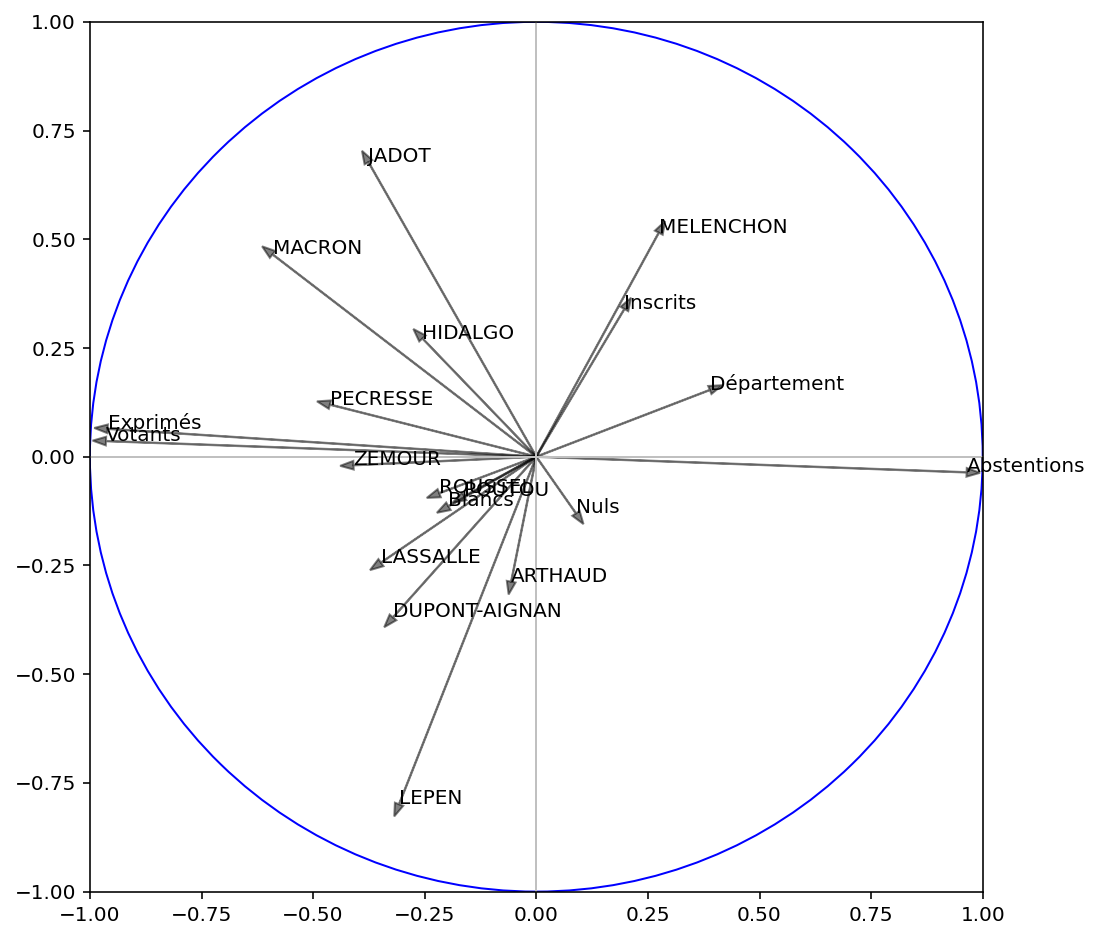

In [89]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(df_ACP_norm.columns[j],(corvar[j,0],corvar[j,1]))
    plt.arrow(0, 0, corvar[j, 0], corvar[j, 1], color='k', alpha=0.5, head_width=0.02)
    
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

Que pouvons\-nous en déduire ?

- Tout d'abord, le cercle des corrélations confirme notre première hypothèse que Lepen et Mélenchon ont des résultats très corrélés négativement \(les flèches sont proches d'être colinéaires, mais de sens opposé\) 
- On voit aussi que globalement, moins il y a d'abstention, meilleur sont les scores pour les candidats hormis pour Mélenchon comme remarqué au début



Poursuivons notre analyse en mettant en lien le nuage de points :


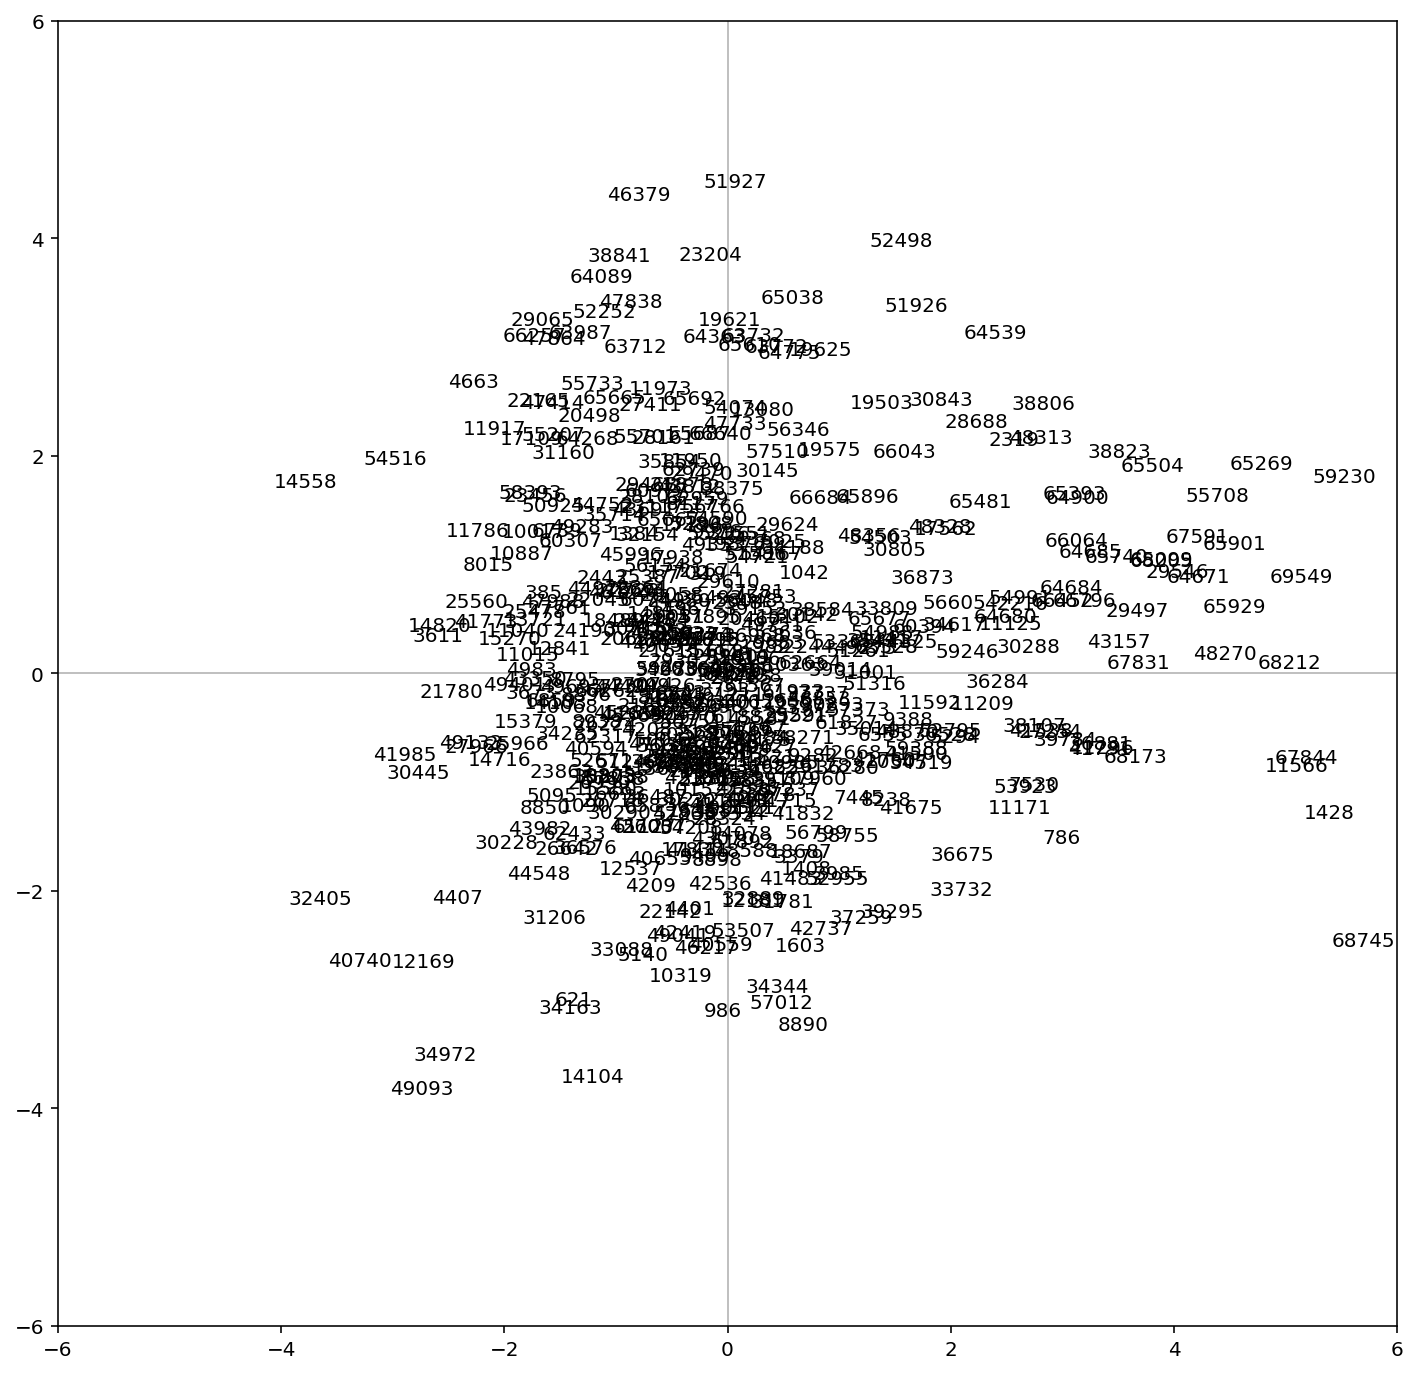

In [91]:
# Préparation de l'affichage
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(taille_sous_echantillon):
    plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]))
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.show()

Nous pouvons tout d'abord essayer de regarder les points qui ont une forte abstention. Au vu du cercle des corrélations, on s'attend à ce que plus un point est à droite, plus il a d'abstention :


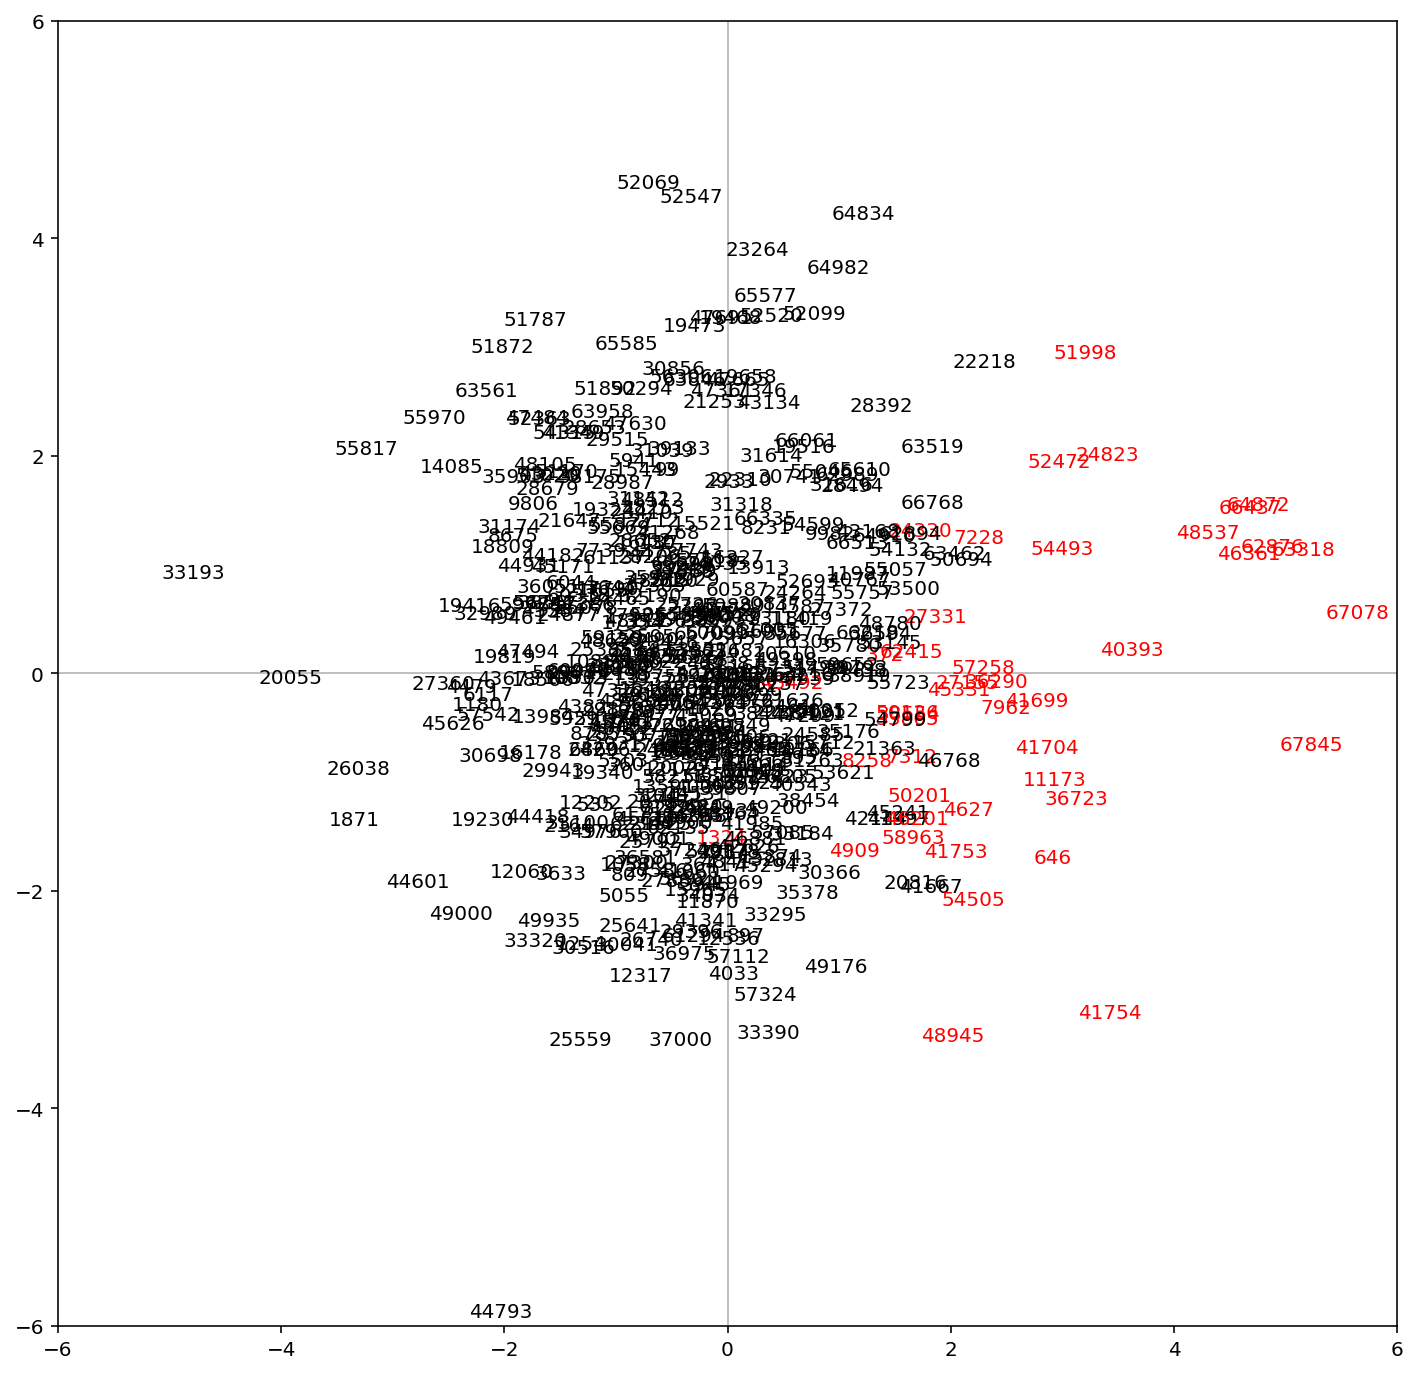

In [24]:
# Préparation de l'affichage
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(taille_sous_echantillon):
    ligne = df_ACP[nombres_tries[i]:nombres_tries[i]+1]
    
    if int(ligne['% Abstentions']) >= 30 : 
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]),color='red') # forte abstention
    else :
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1])) # peu d'abstention
        
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.show()

Et c'est bien le résultat que nous obtenons !

Si nous regardons le point extrême dont nous parlions tout à l'heure, on remarque qu'il est particulièrement excentré à droite. Son absentions doit être assez élevé. 


In [27]:
coord[69569,0:2]

array([8.12508191, 0.33311713])

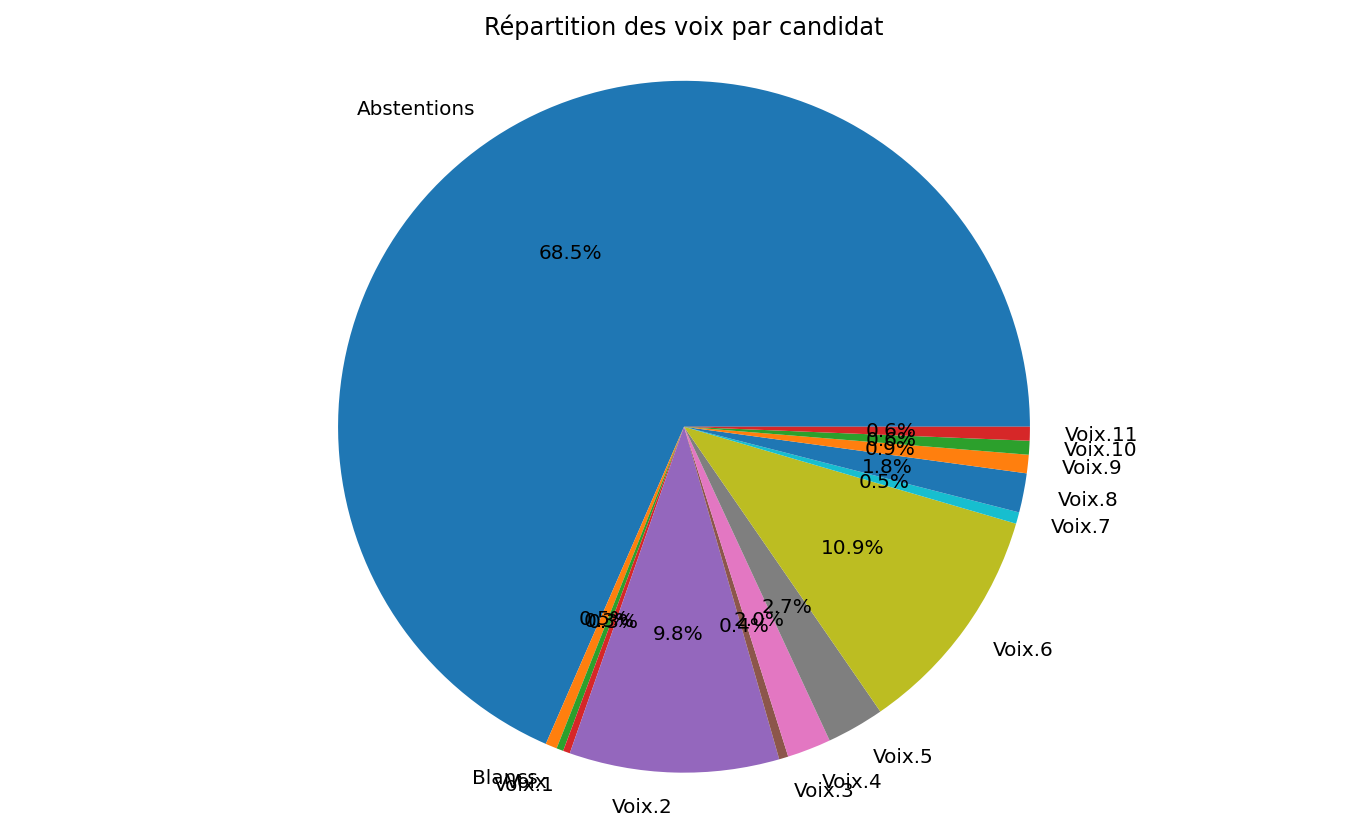

In [5]:
df_forte_contribution = df[69569:69570]

selected_variables = ['Abstentions','Blancs','Voix','Voix.1','Voix.2','Voix.3','Voix.4','Voix.5','Voix.6','Voix.7','Voix.8','Voix.9','Voix.10','Voix.11']
selected_data = df_forte_contribution[selected_variables]
plt.pie(selected_data.mean(), labels=selected_data.columns, autopct='%1.1f%%')
plt.title('Répartition des voix par candidat')
plt.axis('equal')
plt.show()

Nous obtenons en effet un taux d'abstention particulièrement élevé !

Continuons notre petite analyse pour essayer de déterminer à quoi correspondent les axes.


On peut regarder les résultats pour un candidat en particulier. Macron ici :


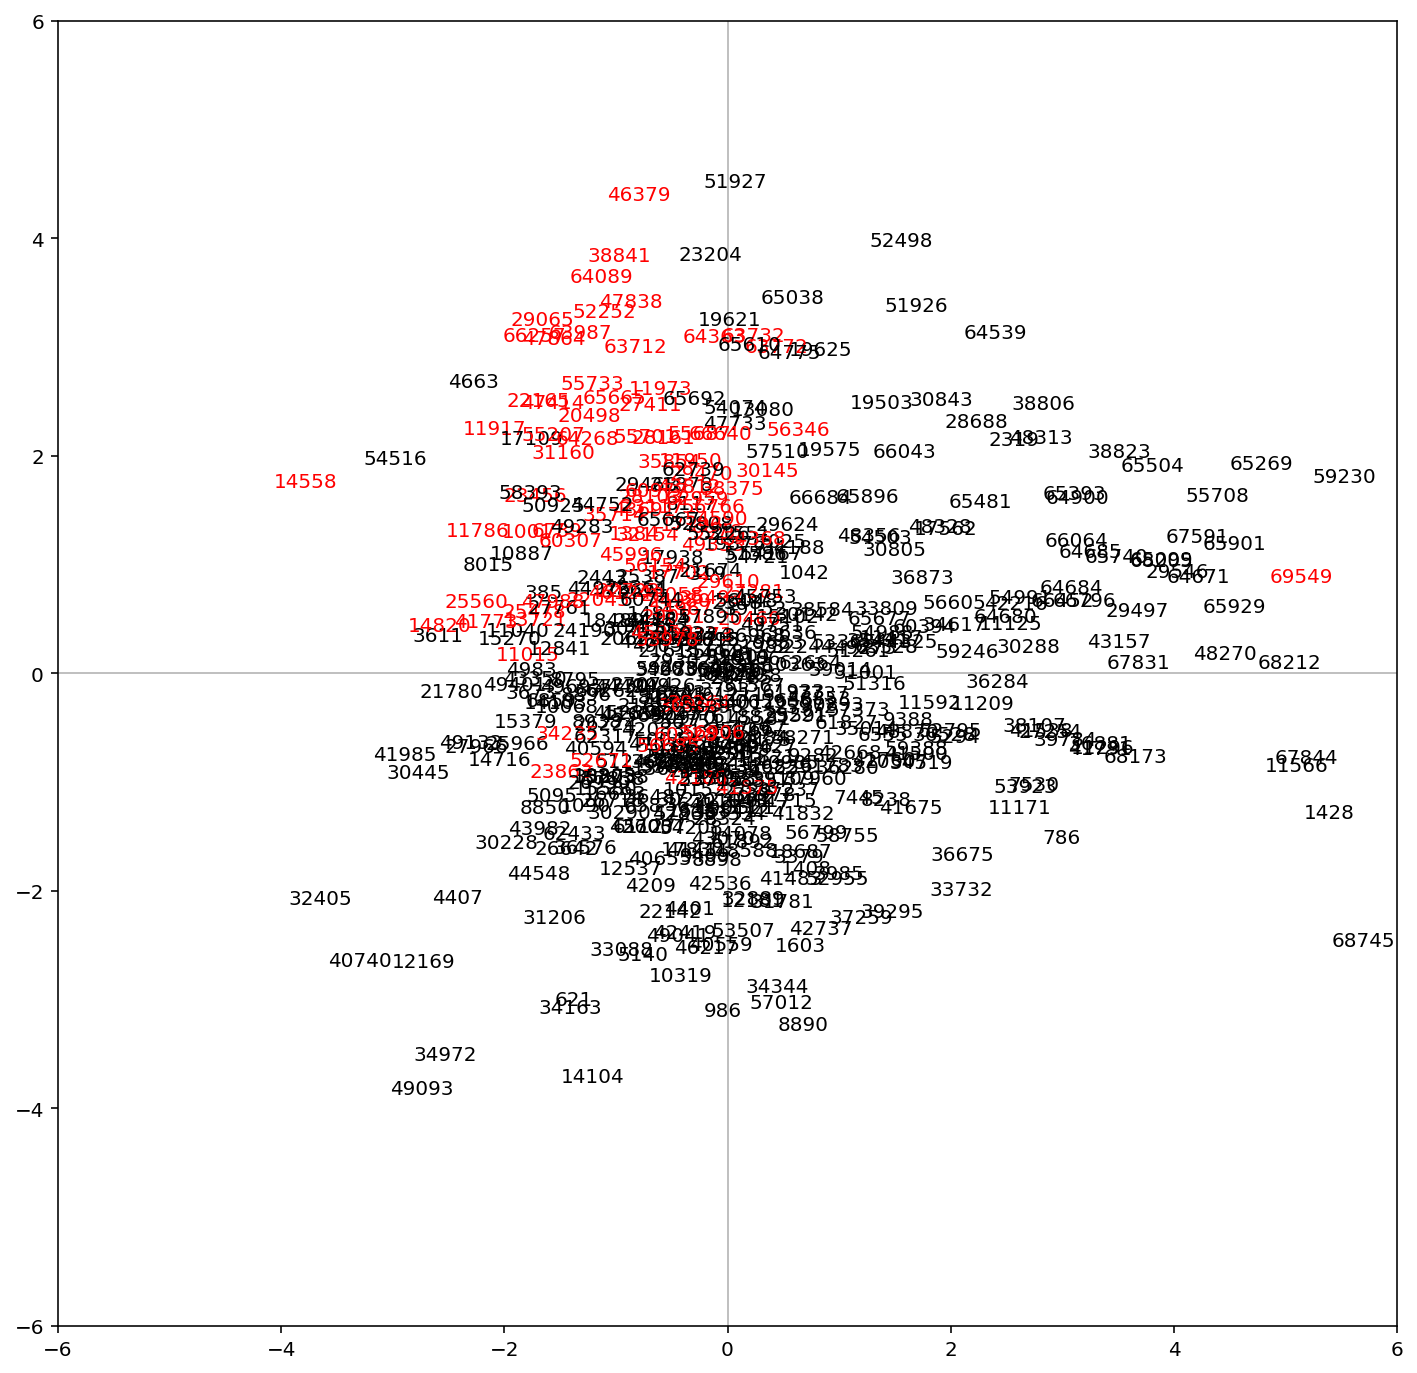

In [92]:
# Préparation de l'affichage
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(taille_sous_echantillon):
    ligne = df_ACP[nombres_tries[i]:nombres_tries[i]+1]
    score_Macron = float(ligne['% MACRON']) #on récupère le score de MACRON pour chaque bureau de vote
    
    if score_Macron >= 25 : # on cherche dans quel bureau de vote Macron a bien performé (moyenne nationale : 20.2)
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]),color='red')
    else :
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]))
        
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.show()

Lepen :


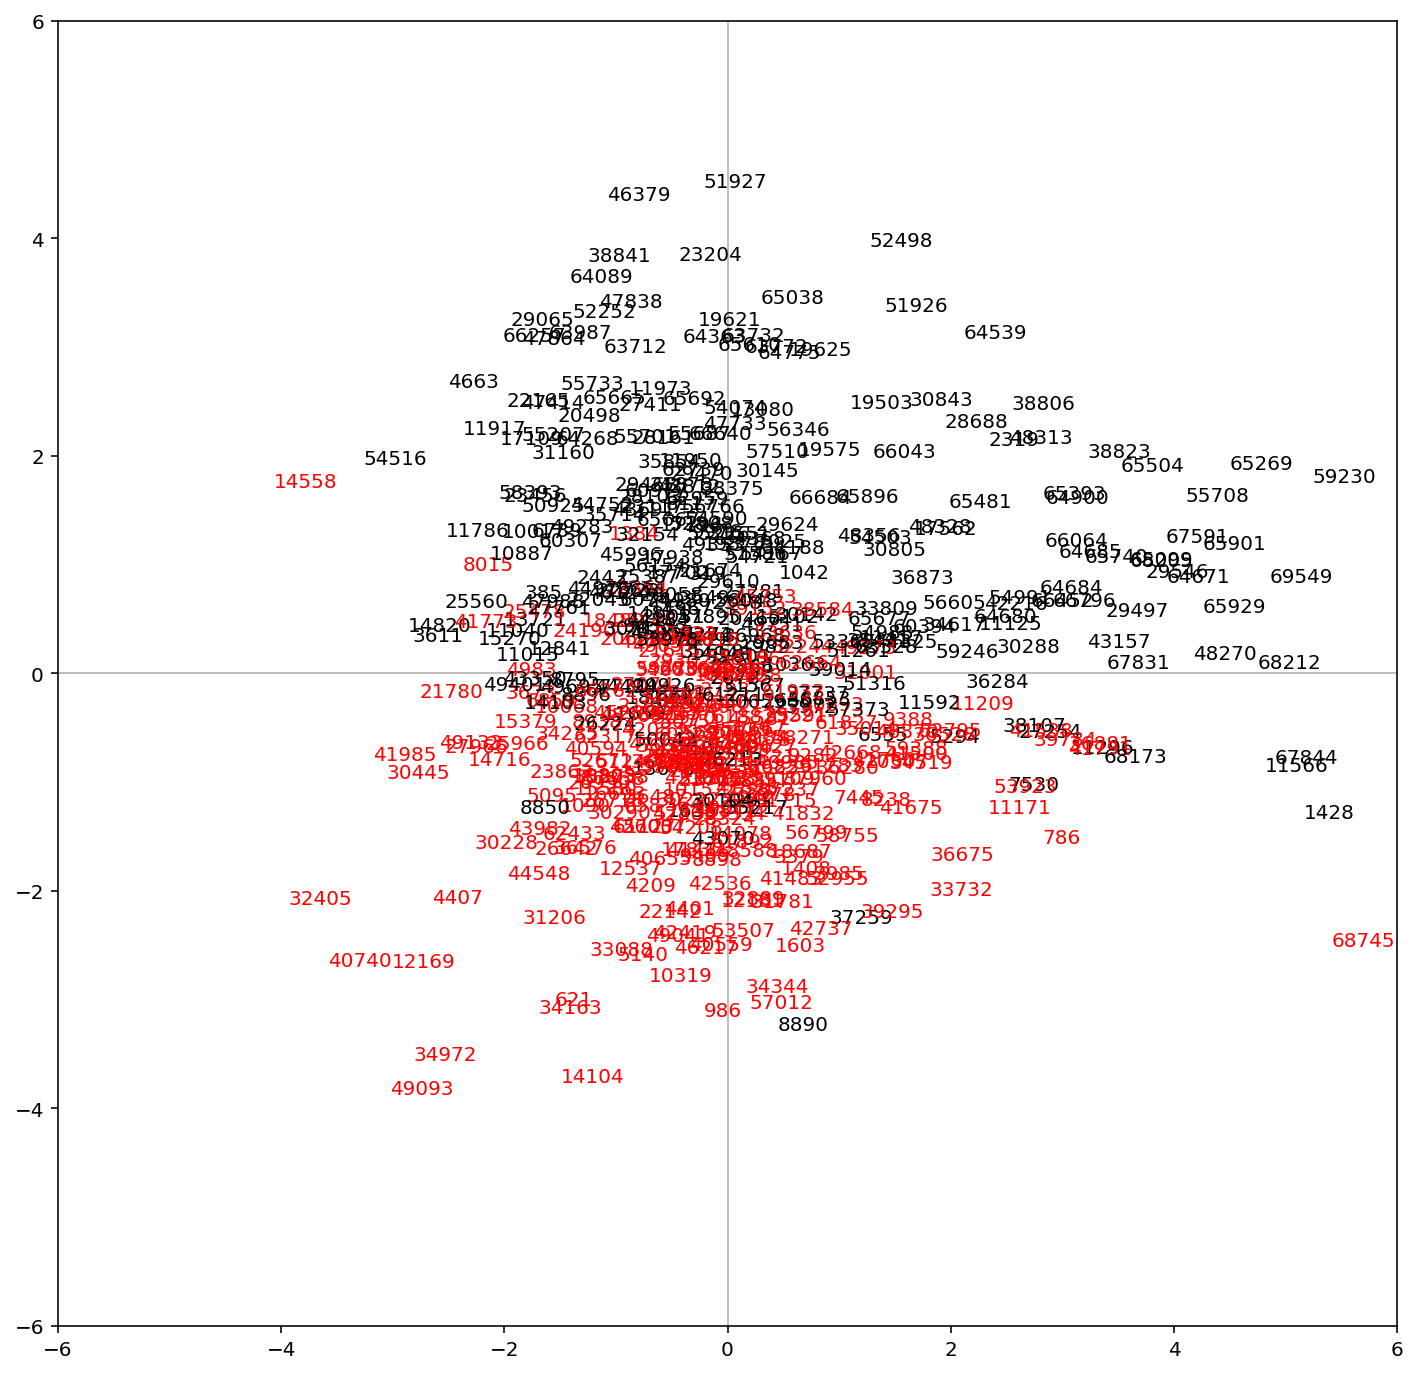

In [93]:
# Préparation de l'affichage
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(taille_sous_echantillon):
    ligne = df_ACP[nombres_tries[i]:nombres_tries[i]+1]
    score_Lepen = float(ligne['% LEPEN']) #on récupère le score de LEPEN pour chaque bureau de vote
    
    if score_Lepen >= 20 : # on cherche dans quel bureau de vote Lepen a bien performé (moyenne nationale : 16,8)
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]),color='red')
    else :
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]))
        
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.show()

Mélenchon :


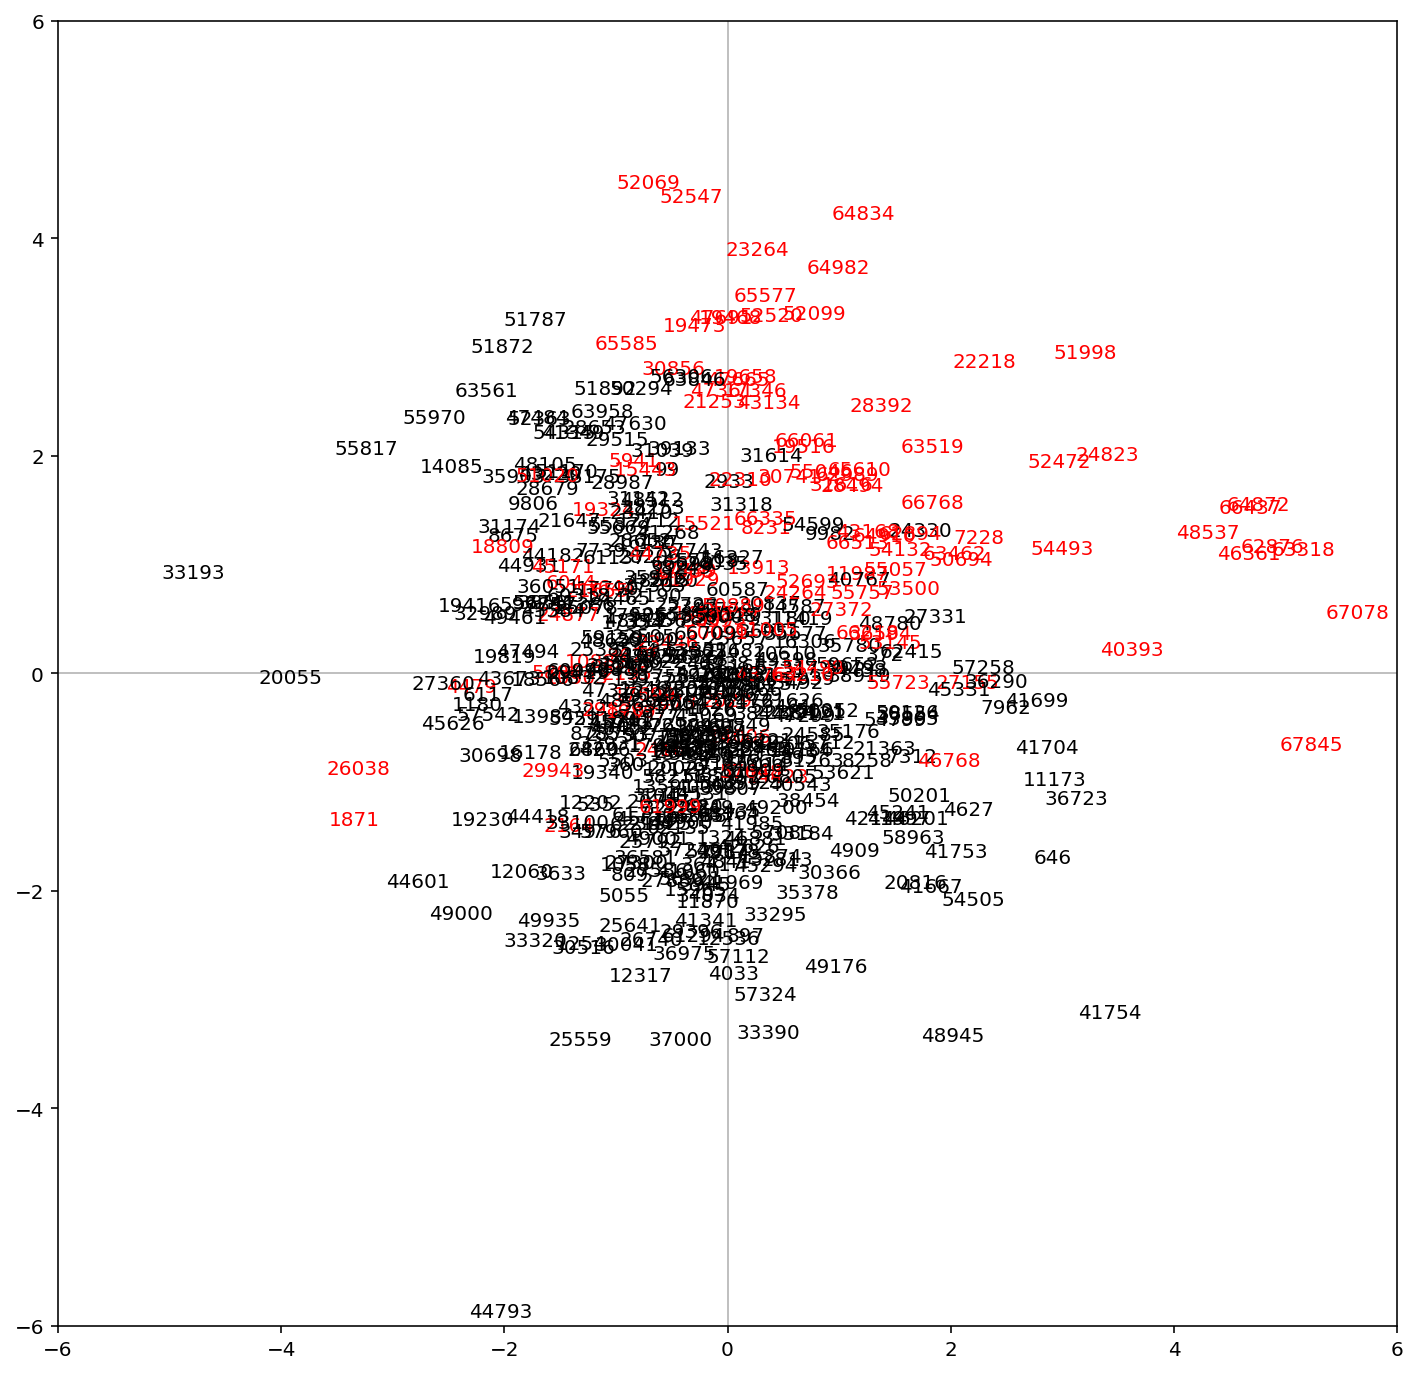

In [28]:
# Préparation de l'affichage
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(taille_sous_echantillon):
    ligne = df_ACP[nombres_tries[i]:nombres_tries[i]+1]
    score_Melenchon = float(ligne['% MELENCHON']) #on récupère le score de Mélenchon pour chaque bureau de vote
    
    if score_Melenchon >= 18 : # on cherche dans quel bureau de vote Lepen a bien performé (moyenne nationale : 15,9)
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]),color='red')
    else :
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]))
        
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.show()

Les résultats sont assez bien regroupé par zone. On observe 3 nuages de points assez distincts. 

- en haut à gauche : Macron 
- en haut à droite : Mélenchon
- en bas : Lepen



Si on rajoute les autres candidats en les classant en 3 grandes classes politiques \(gauche, centre, droite\), on obtient le résultat suivant :


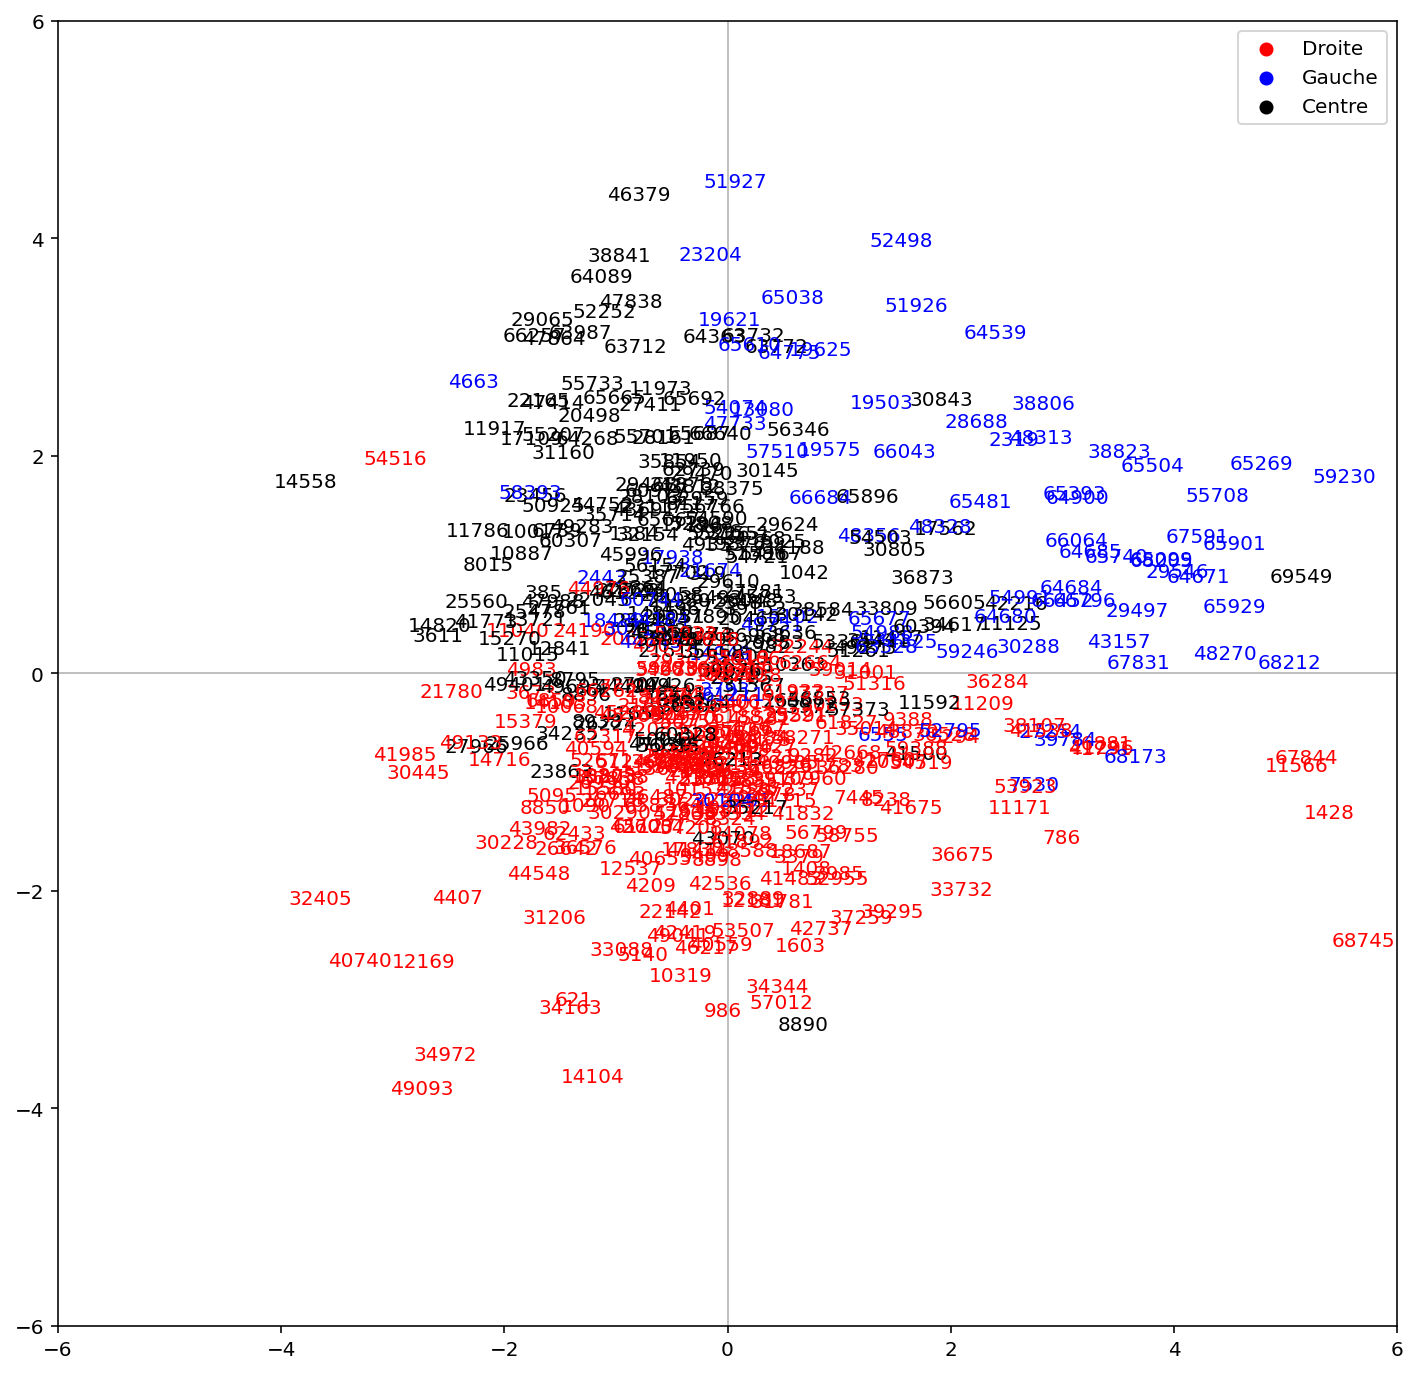

In [96]:
# Préparation de l'affichage
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(taille_sous_echantillon):
    ligne = df_ACP[nombres_tries[i]:nombres_tries[i]+1]
    sous_ligne = ligne[['% ARTHAUD', '% ROUSSEL', '% MACRON', '% LASSALLE', '% LEPEN', '% ZEMOUR', '% MELENCHON', '% HIDALGO', '% JADOT', '% PECRESSE', '% POUTOU', '% DUPONT-AIGNAN']]
    nb_vote_max = sous_ligne.max().max()
    
    if (int(nb_vote_max) == int(sous_ligne['% LEPEN'])) or (int(nb_vote_max) == int(sous_ligne['% ZEMOUR'])) or (int(nb_vote_max) == int(sous_ligne['% PECRESSE'])) or (int(nb_vote_max) == int(sous_ligne['% DUPONT-AIGNAN'])) : # on cherche dans quel bureau un candidat classé à droite a remporté le plus de voix
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]),color='red') # au centre
    elif (int(nb_vote_max) == int(sous_ligne['% MACRON'])) or (int(nb_vote_max) == int(sous_ligne['% LASSALLE'])) :
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]))
    else :
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]),color='blue') # à gauche
        
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

# Ajouter la légende
plt.scatter([], [], color='red', label='Droite')
plt.scatter([], [], color='blue', label='Gauche')
plt.scatter([], [], color='black', label='Centre')
plt.legend()

plt.show()

Un axe y=x pourrait ainsi représenter la couleur politique du candidat gagnant dans chaque bureau de vote. En haut à droite étant classé politique à gauche, et en bas à gauche classé politiquement à droite


On peut aussi regarder si le nombre d'inscrits joue un rôle dans la définition d'un des 2 axes principaux


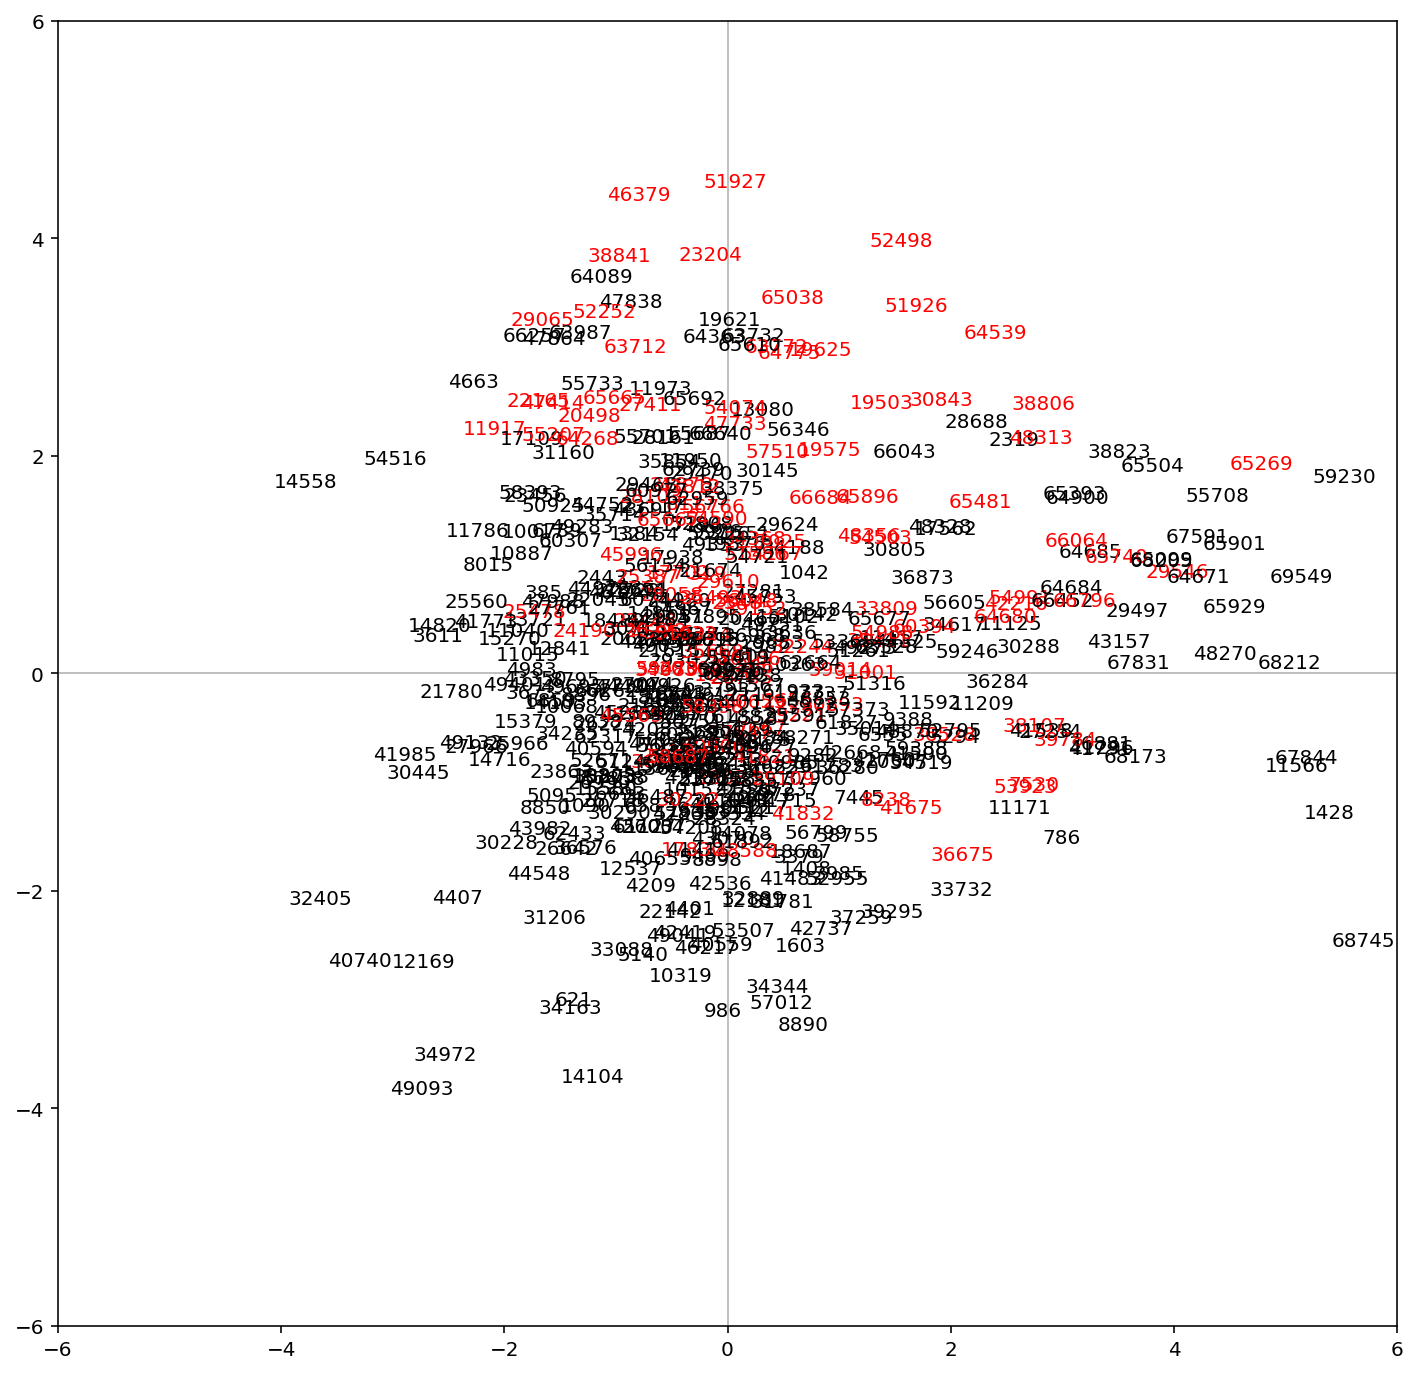

In [94]:
# Préparation de l'affichage
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(taille_sous_echantillon):
    ligne = df_ACP[nombres_tries[i]:nombres_tries[i]+1]
    
    if int(ligne['Inscrits']) >= 1000 : # on cherche dans quel bureau il y avait beaucoup d'inscrits
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]),color='red')
    else :
        plt.annotate(df_ACP_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]))
        
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.show()

Plus il y a d'inscrits dans le bureau de vote, plus le points est en haut, mais ce n'est pas un résultat très marqué.


Pour finir, regardons 4 points extrêmes \(en bas, en haut, à droite, à gauche\) et comparons les aux résultats globaux : 


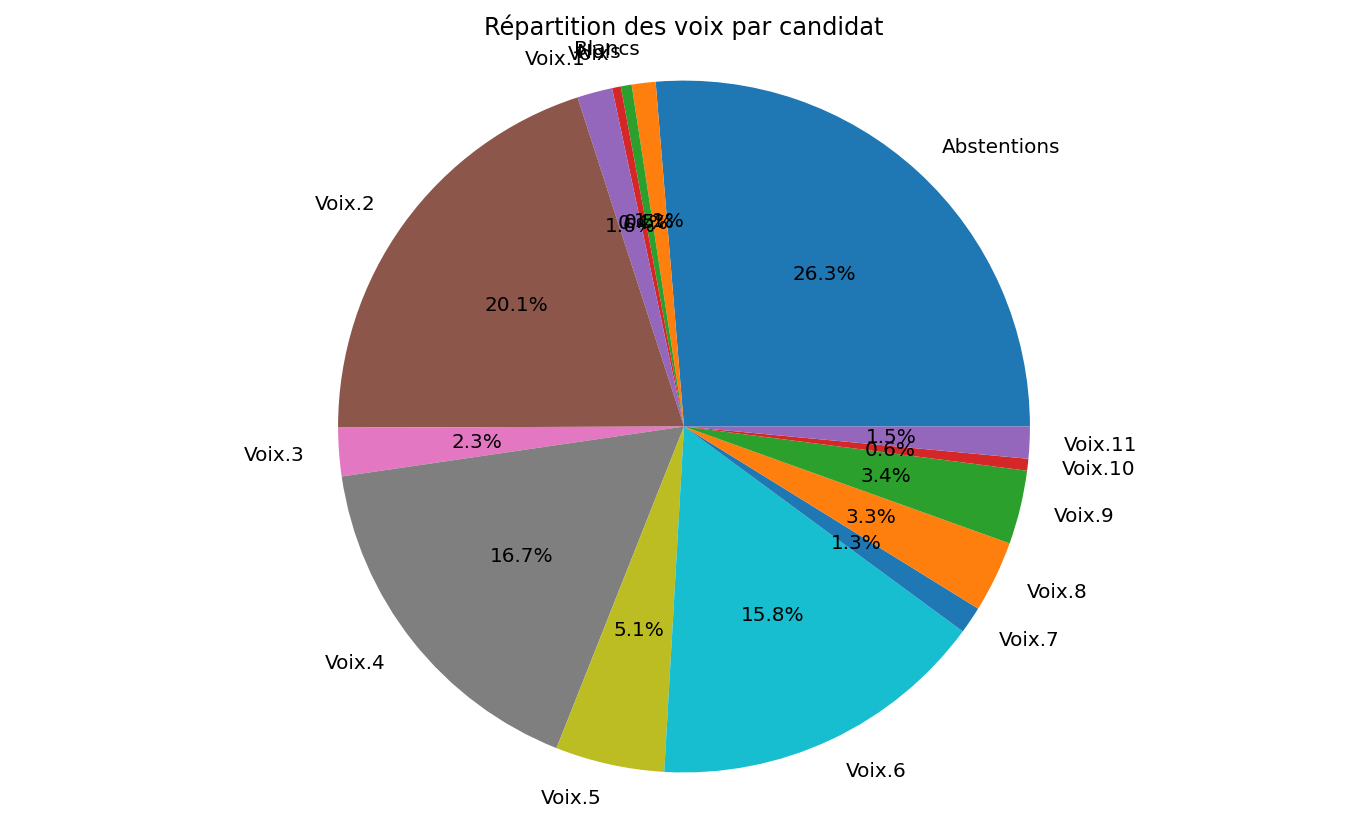

In [100]:
# Résultats globaux
selected_variables = ['Abstentions', 'Blancs', 'Nuls', 'Voix', 'Voix.1', 'Voix.2', 'Voix.3', 'Voix.4', 'Voix.5', 'Voix.6', 'Voix.7', 'Voix.8', 'Voix.9', 'Voix.10', 'Voix.11']
selected_data = df[selected_variables].sum(axis=0)
plt.pie(selected_data, labels=selected_data.index, autopct='%1.1f%%')
plt.title('Répartition des voix par candidat')
plt.axis('equal')
plt.show()

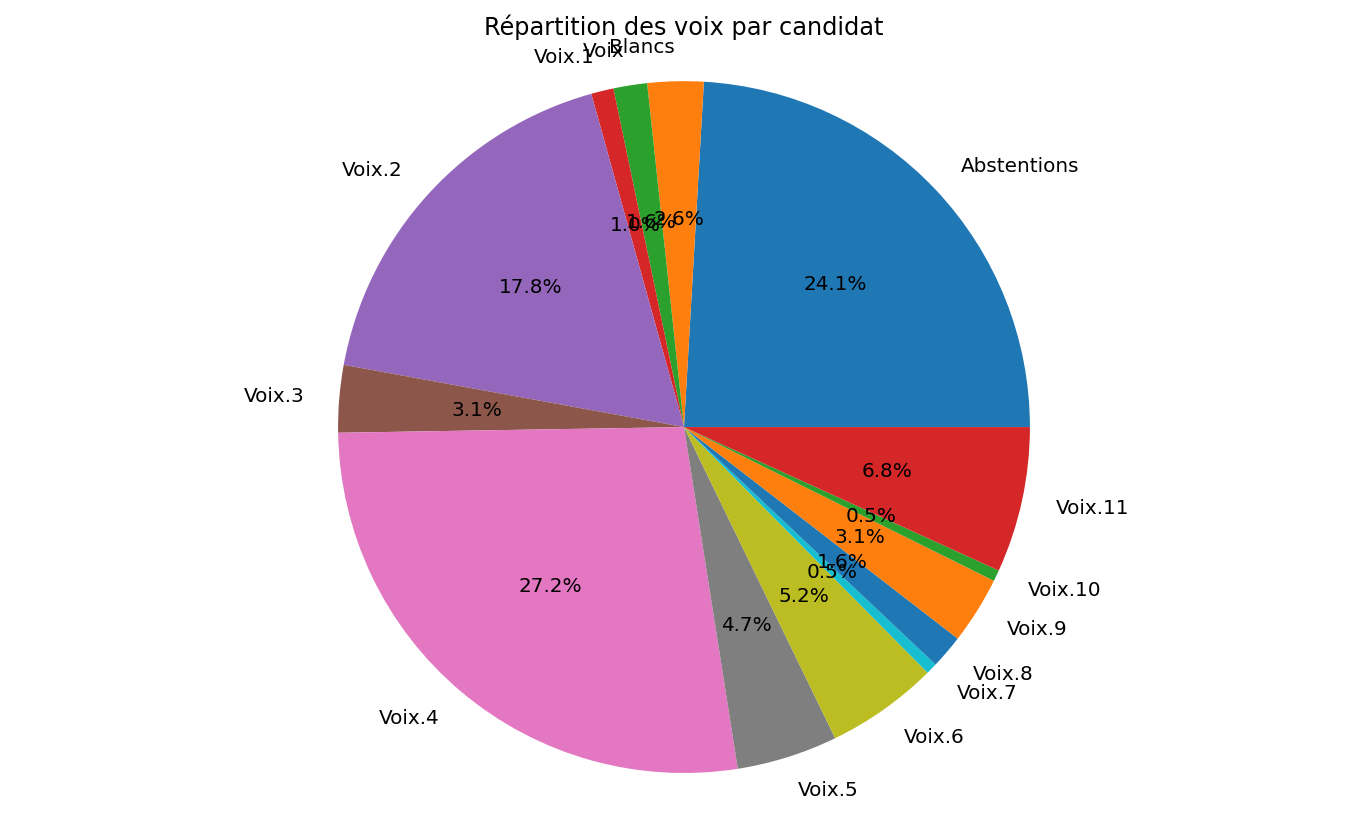

In [37]:
# Bureau de vote placé en bas sur le nuage de points
df_bas = df[37000:37001]

selected_variables = ['Abstentions','Blancs','Voix','Voix.1','Voix.2','Voix.3','Voix.4','Voix.5','Voix.6','Voix.7','Voix.8','Voix.9','Voix.10','Voix.11']
selected_data = df_bas[selected_variables]
plt.pie(selected_data.mean(), labels=selected_data.columns, autopct='%1.1f%%')
plt.title('Répartition des voix par candidat')
plt.axis('equal')
plt.show()

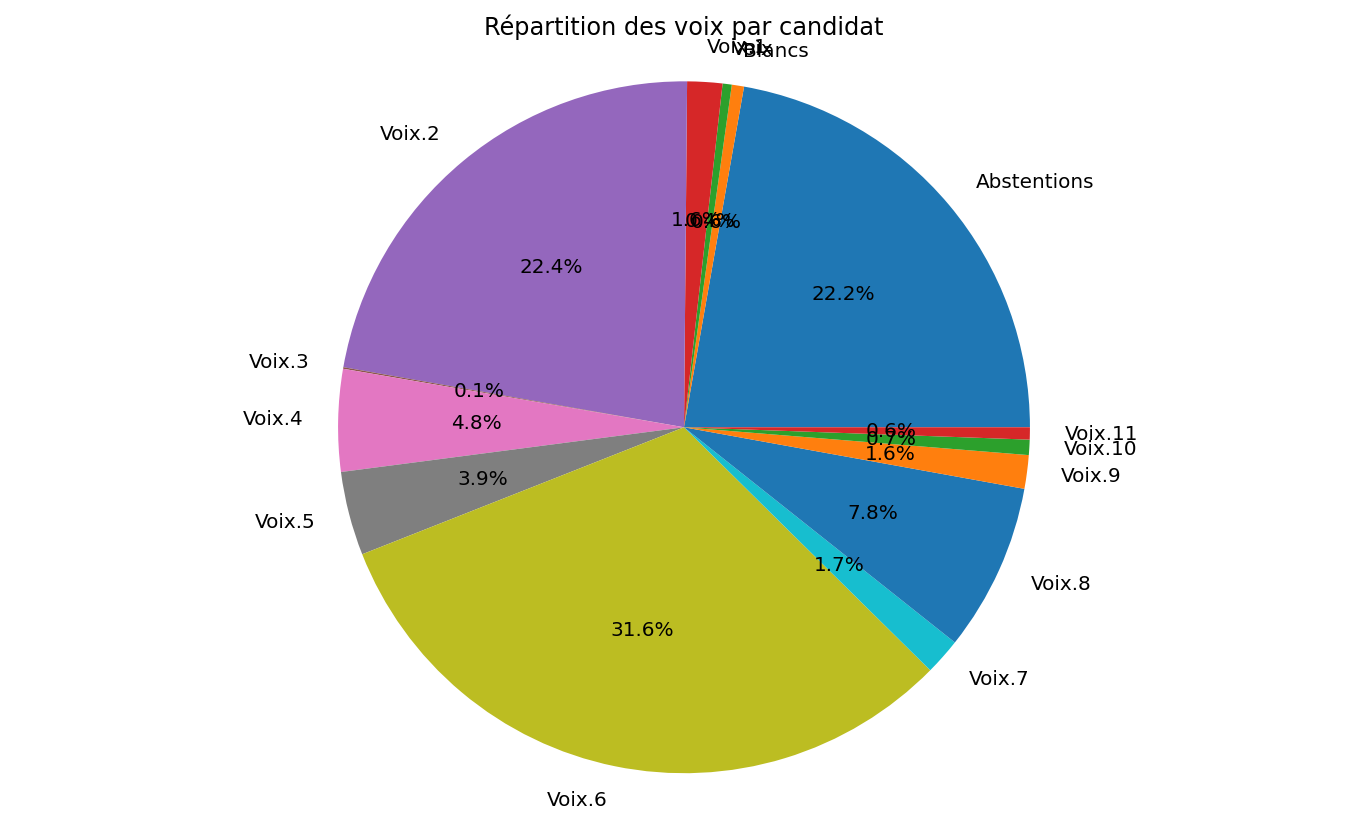

In [38]:
# Bureau de vote placé en haut sur le nuage de points
df_haut = df[51927:51928]

selected_variables = ['Abstentions','Blancs','Voix','Voix.1','Voix.2','Voix.3','Voix.4','Voix.5','Voix.6','Voix.7','Voix.8','Voix.9','Voix.10','Voix.11']
selected_data = df_haut[selected_variables]
plt.pie(selected_data.mean(), labels=selected_data.columns, autopct='%1.1f%%')
plt.title('Répartition des voix par candidat')
plt.axis('equal')
plt.show()

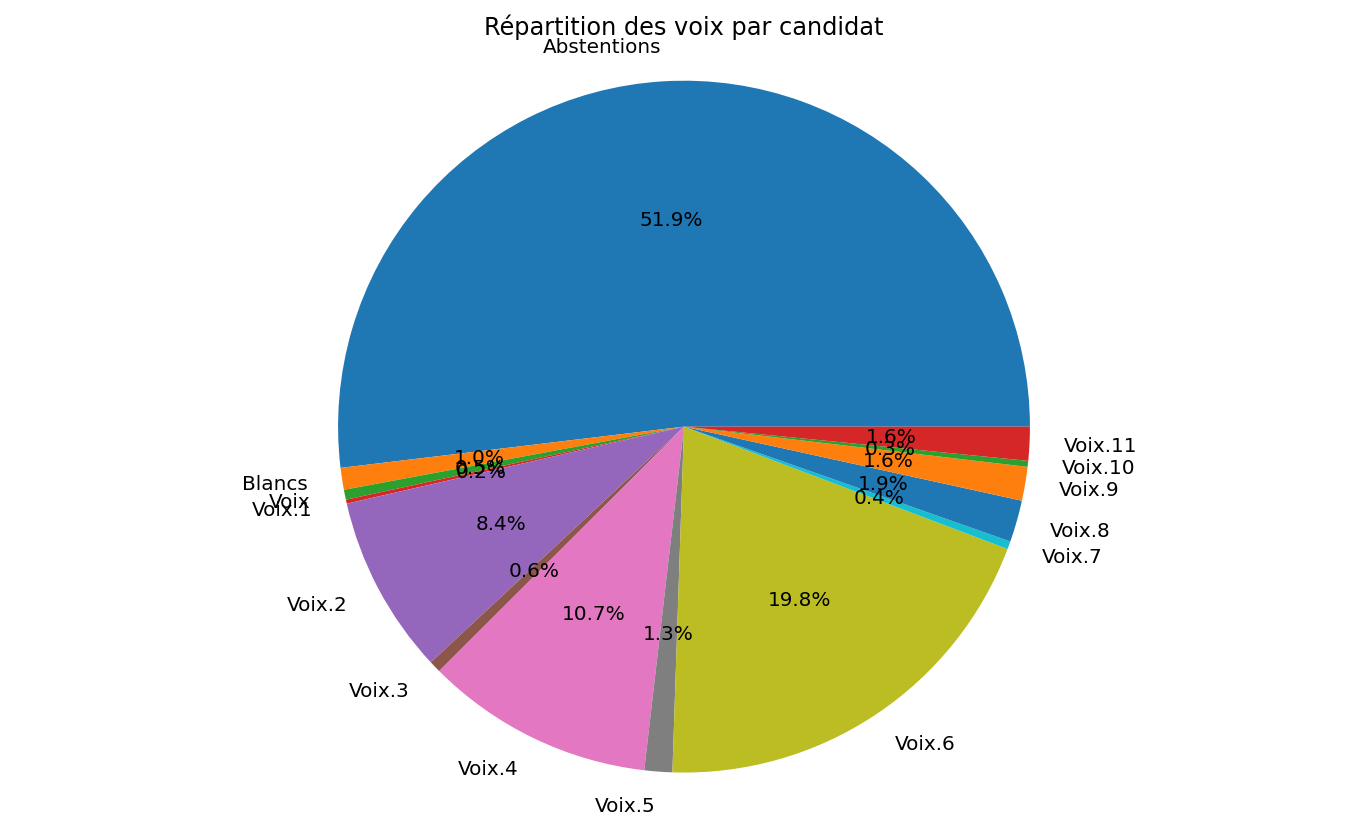

In [39]:
# Bureau de vote placé à droite sur le nuage de points
df_droite = df[68212:68213]

selected_variables = ['Abstentions','Blancs','Voix','Voix.1','Voix.2','Voix.3','Voix.4','Voix.5','Voix.6','Voix.7','Voix.8','Voix.9','Voix.10','Voix.11']
selected_data = df_droite[selected_variables]
plt.pie(selected_data.mean(), labels=selected_data.columns, autopct='%1.1f%%')
plt.title('Répartition des voix par candidat')
plt.axis('equal')
plt.show()

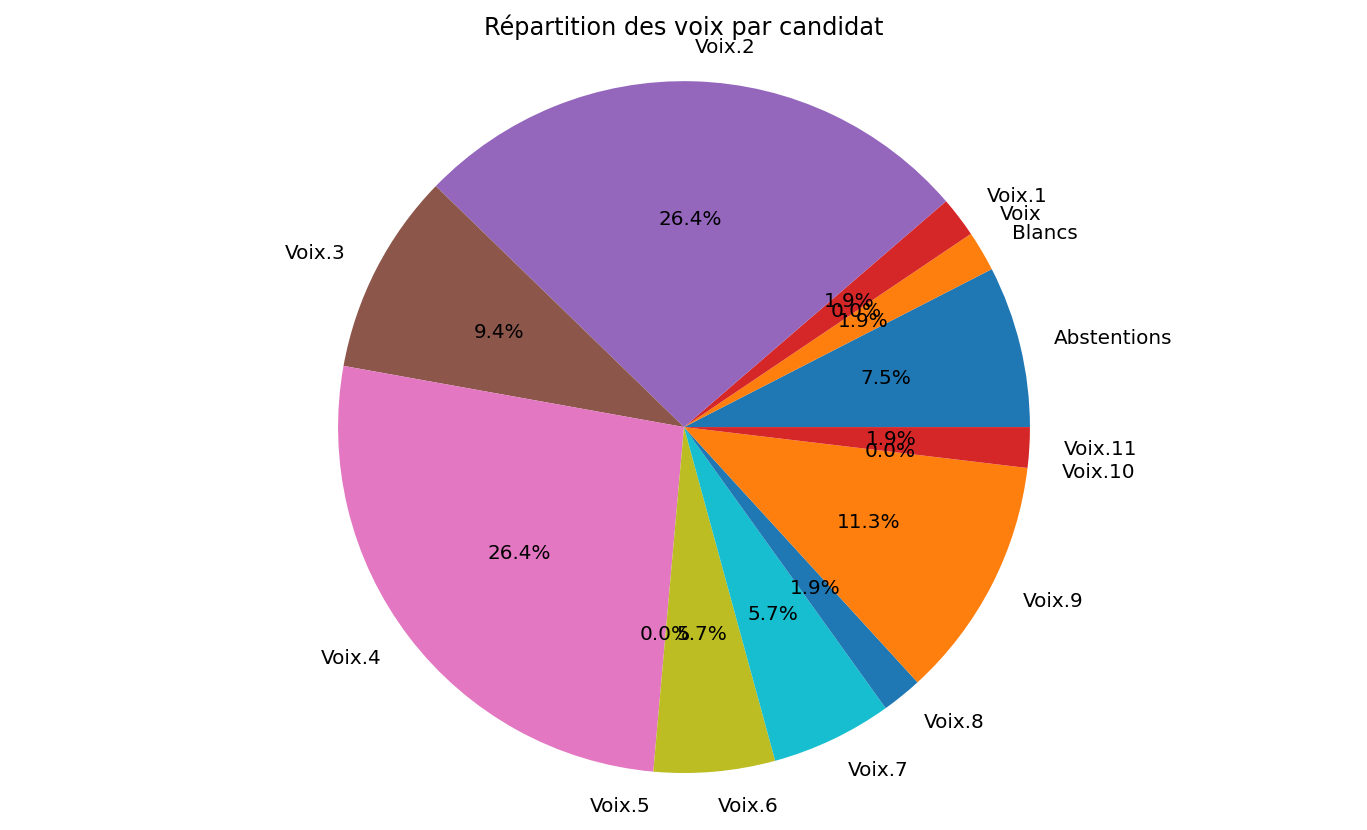

In [40]:
# Bureau de vote placé à gauche sur le nuage de points
df_gauche = df[20055:20056]

selected_variables = ['Abstentions','Blancs','Voix','Voix.1','Voix.2','Voix.3','Voix.4','Voix.5','Voix.6','Voix.7','Voix.8','Voix.9','Voix.10','Voix.11']
selected_data = df_gauche[selected_variables]
plt.pie(selected_data.mean(), labels=selected_data.columns, autopct='%1.1f%%')
plt.title('Répartition des voix par candidat')
plt.axis('equal')
plt.show()

Afin de faciliter l'analyse, rassembler les graphiques :


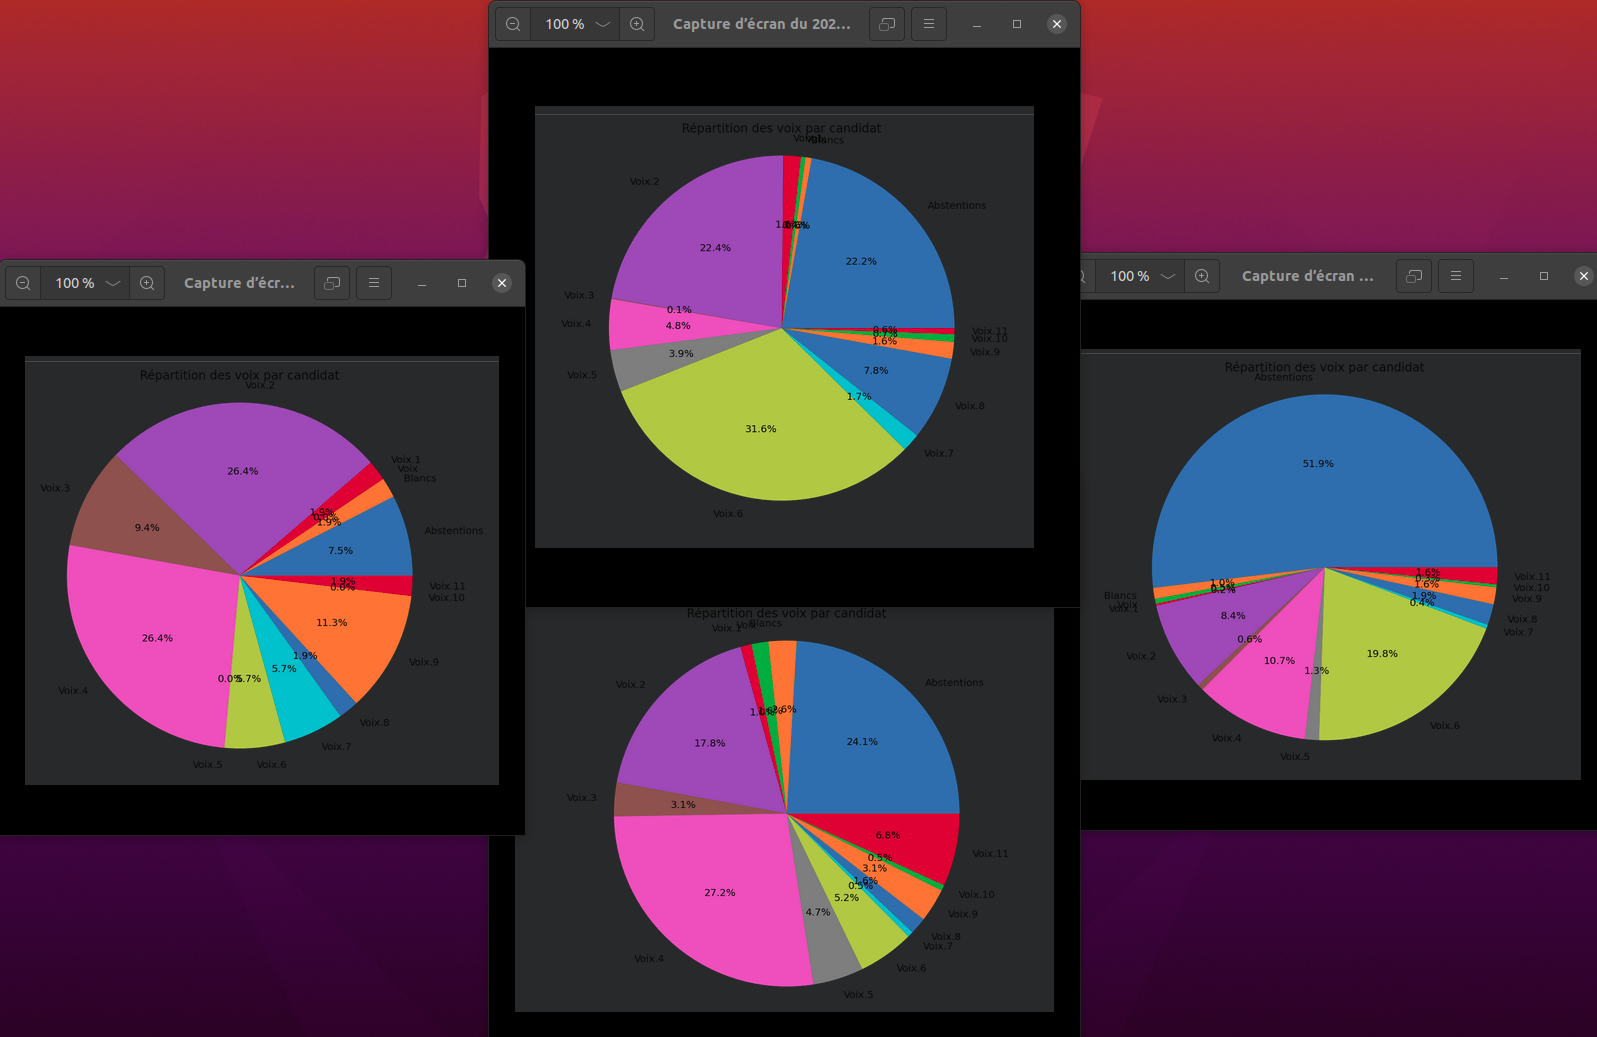

In [55]:
from IPython.display import Image
image_path = 'Analyse_du_nuage_de_points.png' 
image = Image(filename=image_path)
display(image)

Le lien entre l'abstention et l'axe horizontal est ici aussi flagrant

L'axe vertical semble de son côté représenter beaucoup la couleur politique, avec de bons résultats pour les candidats droite lorsqu'ils sont e bas nu nuage de points.
